# ***Importing Data Sets***






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

# ***Exploratory Data Analysis (EDA) / Data Understanding***




In [ ]:
df = pd.read_csv('/content/Raw_Males_VF1.csv')
df.head(11)

SUBJECT_ID SEX  AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  \
0       B0011   M         47    46      187.0     152.24   
1       B0012   M         52    54      182.0     167.36   
2       B0013   M         62    28      175.0      82.92   
3       B0014   M         56    26        1.8      76.45   
4       B0015   M         48    25        1.7      65.36   
5       B0016   M         70    27      180.0      76.57   
6       B0017   M         65    21      189.0      63.37   
7       B0018   M         54    24      192.0      81.79   
8       B0019   M         49    23      189.0      74.41   
9       B0020   M         57    26      188.0      84.00   
10      B0021   M         61    23      180.0      71.71   

    WAIST_CIRCUMFERENCE_cm  DIASTOLIC_BLOOD_PRESSURE_mmHg  \
0                      154                            133   
1                      139                            111   
2                       93                            118   
3                       85                             91   
4                       84                             76   
5                       95                             83   
6                       76                             93   
7                       87                             81   
8                       80                             95   
9                       91                             82   
10                      85                             78   

    SYSTOLIC_BLOOD_PRESSURE_mmHg  WALK_DURATION_PER_DAY_MINUTES  \
0                          178.0                             52   
1                          187.0                             50   
2                          160.0                             58   
3                          139.0                            151   
4                           98.0                            257   
5                          127.0                             68   
6                          123.0                             85   
7                          123.0                             38   
8                          136.0                             44   
9                          109.0                             61   
10                         112.0                            175   

    COMPUTER_USE_TIME_PER_DAY_HOURS  SMOKING_STATUS  DISCONTINUED_NO_  \
0                                 7              0.0             XNBH   
1                                 3              0.0              NaN   
2                                 6              0.0              NaN   
3                                 2              0.0              NaN   
4                                 6              0.0              NaN   
5                                 5              0.0              NaN   
6                                 3              0.0              NaN   
7                                10              0.0              NaN   
8                                 3              0.0              NaN   
9                                 0              0.0              NaN   
10                                5              0.0              NaN   

    CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  
0                           NaN                       -0.76  
1                           NaN                       -0.59  
2                           NaN                        0.59  
3                           NaN                        0.50  
4                           NaN                        0.39  
5                           NaN                        0.27  
6                           NaN                        0.24  
7                           NaN                        0.23  
8                           NaN                        0.22  
9                           NaN                        0.18  
10                          NaN                        0.14

In [ ]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  2864
Number of Columns:  15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SUBJECT_ID                       2864 non-null   object 
 1   SEX                              2864 non-null   object 
 2   AGE_years                        2864 non-null   int64  
 3   BMI                              2864 non-null   int64  
 4   HEIGHT_cm                        2864 non-null   float64
 5   WEIGHT_kg                        2864 non-null   float64
 6   WAIST_CIRCUMFERENCE_cm           2864 non-null   int64  
 7   DIASTOLIC_BLOOD_PRESSURE_mmHg    2864 non-null   int64  
 8   SYSTOLIC_BLOOD_PRESSURE_mmHg     2859 non-null   float64
 9   WALK_DURATION_PER_DAY_MINUTES    2864 non-null   int64  
 10  COMPUTER_USE_TIME_PER_DAY_HOURS  2864 non-null   int64  
 11  SMOKING_STATUS                   2862 non-null   float64
 12  DISCONTINUED_NO_    

In [ ]:
df.describe().T

count        mean        std    min  \
AGE_years                        2864.0   62.324721   8.509000  41.00   
BMI                              2864.0   29.284567   3.885323  20.00   
HEIGHT_cm                        2864.0  182.935929   8.671651   1.70   
WEIGHT_kg                        2864.0   91.345150  13.678241  55.41   
WAIST_CIRCUMFERENCE_cm           2864.0   99.055168  10.137395  70.00   
DIASTOLIC_BLOOD_PRESSURE_mmHg    2864.0   91.596718  10.631628  48.00   
SYSTOLIC_BLOOD_PRESSURE_mmHg     2859.0  133.770199  16.834580  90.00   
WALK_DURATION_PER_DAY_MINUTES    2864.0   81.696578  64.805761   1.00   
COMPUTER_USE_TIME_PER_DAY_HOURS  2864.0    4.531425   4.421835   0.00   
SMOKING_STATUS                   2862.0    0.040531   0.197236   0.00   
CIGARETTES_CONSUMED_PER_DAY       129.0   23.527132  13.259476   2.00   
Visceral_Fat_Volume_Litres       2864.0    5.553844   2.626842  -0.76   

                                      25%      50%       75%     max  
AGE_years                         57.0000   63.000   69.0000  190.00  
BMI                               27.0000   29.000   31.0000   54.00  
HEIGHT_cm                        178.0000  183.000  188.0000  210.00  
WEIGHT_kg                         81.9175   89.725   98.7400  168.77  
WAIST_CIRCUMFERENCE_cm            92.0000   98.000  105.0000  154.00  
DIASTOLIC_BLOOD_PRESSURE_mmHg     84.0000   91.000   99.0000  133.00  
SYSTOLIC_BLOOD_PRESSURE_mmHg     122.0000  132.000  144.0000  192.00  
WALK_DURATION_PER_DAY_MINUTES     46.0000   67.000   92.0000  656.00  
COMPUTER_USE_TIME_PER_DAY_HOURS    2.0000    3.000    6.0000   69.00  
SMOKING_STATUS                     0.0000    0.000    0.0000    1.00  
CIGARETTES_CONSUMED_PER_DAY       12.0000   22.000   34.0000   50.00  
Visceral_Fat_Volume_Litres         3.6800    5.350    7.1525   16.06

In [ ]:
df.describe()

AGE_years         BMI     HEIGHT_cm    WEIGHT_kg  \
count  2864.000000  2864.000000  2864.000000  2864.000000   
mean     62.324721    29.284567   182.935929    91.345150   
std       8.509000     3.885323     8.671651    13.678241   
min      41.000000    20.000000     1.700000    55.410000   
25%      57.000000    27.000000   178.000000    81.917500   
50%      63.000000    29.000000   183.000000    89.725000   
75%      69.000000    31.000000   188.000000    98.740000   
max     190.000000    54.000000   210.000000   168.770000   

       WAIST_CIRCUMFERENCE_cm  DIASTOLIC_BLOOD_PRESSURE_mmHg  \
count             2864.000000                    2864.000000   
mean                99.055168                      91.596718   
std                 10.137395                      10.631628   
min                 70.000000                      48.000000   
25%                 92.000000                      84.000000   
50%                 98.000000                      91.000000   
75%                105.000000                      99.000000   
max                154.000000                     133.000000   

       SYSTOLIC_BLOOD_PRESSURE_mmHg  WALK_DURATION_PER_DAY_MINUTES  \
count                   2859.000000                    2864.000000   
mean                     133.770199                      81.696578   
std                       16.834580                      64.805761   
min                       90.000000                       1.000000   
25%                      122.000000                      46.000000   
50%                      132.000000                      67.000000   
75%                      144.000000                      92.000000   
max                      192.000000                     656.000000   

       COMPUTER_USE_TIME_PER_DAY_HOURS  SMOKING_STATUS   \
count                      2864.000000      2862.000000   
mean                          4.531425         0.040531   
std                           4.421835         0.197236   
min                           0.000000         0.000000   
25%                           2.000000         0.000000   
50%                           3.000000         0.000000   
75%                           6.000000         0.000000   
max                          69.000000         1.000000   

       CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  
count                   129.000000                 2864.000000  
mean                     23.527132                    5.553844  
std                      13.259476                    2.626842  
min                       2.000000                   -0.760000  
25%                      12.000000                    3.680000  
50%                      22.000000                    5.350000  
75%                      34.000000                    7.152500  
max                      50.000000                   16.060000

In [ ]:
df['Intervention'] = np.where(df['Visceral_Fat_Volume_Litres'] <= 3, 0, 1)
df.head()

SUBJECT_ID SEX  AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  \
0      B0011   M         47    46      187.0     152.24   
1      B0012   M         52    54      182.0     167.36   
2      B0013   M         62    28      175.0      82.92   
3      B0014   M         56    26        1.8      76.45   
4      B0015   M         48    25        1.7      65.36   

   WAIST_CIRCUMFERENCE_cm  DIASTOLIC_BLOOD_PRESSURE_mmHg  \
0                     154                            133   
1                     139                            111   
2                      93                            118   
3                      85                             91   
4                      84                             76   

   SYSTOLIC_BLOOD_PRESSURE_mmHg  WALK_DURATION_PER_DAY_MINUTES  \
0                         178.0                             52   
1                         187.0                             50   
2                         160.0                             58   
3                         139.0                            151   
4                          98.0                            257   

   COMPUTER_USE_TIME_PER_DAY_HOURS  SMOKING_STATUS  DISCONTINUED_NO_  \
0                                7              0.0             XNBH   
1                                3              0.0              NaN   
2                                6              0.0              NaN   
3                                2              0.0              NaN   
4                                6              0.0              NaN   

   CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  Intervention  
0                          NaN                       -0.76             0  
1                          NaN                       -0.59             0  
2                          NaN                        0.59             0  
3                          NaN                        0.50             0  
4                          NaN                        0.39             0

<ipython-input-50-7f8b4ca9778c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Visceral_Fat_Volume_Litres'], bins = bin_edges, color = 'orange');


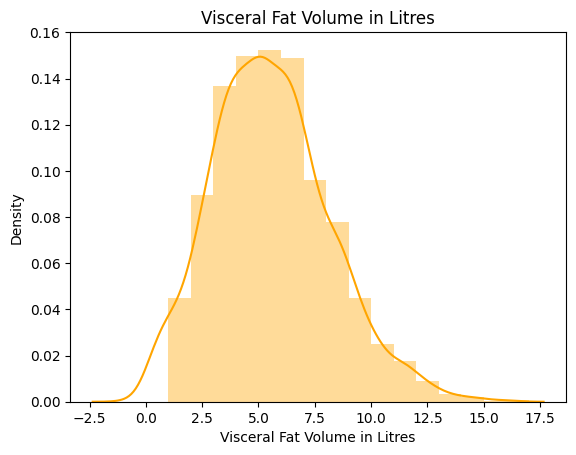

In [ ]:
bin_edges = np.arange(1, df['Visceral_Fat_Volume_Litres'].max()+1, 1)
#plot histogram 
sns.distplot(df['Visceral_Fat_Volume_Litres'], bins = bin_edges, color = 'orange');
plt.title("Visceral Fat Volume in Litres");
plt.xlabel("Visceral Fat Volume in Litres");

array([[<Axes: title={'center': 'Visceral_Fat_Volume_Litres'}>]],
      dtype=object)

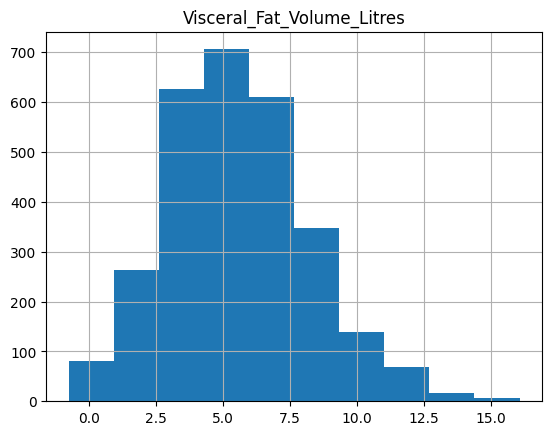

In [ ]:
df.hist(column="Visceral_Fat_Volume_Litres")

<ipython-input-52-a4e1a4994947>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Intervention'], bins = bin_edges, color = 'orange');


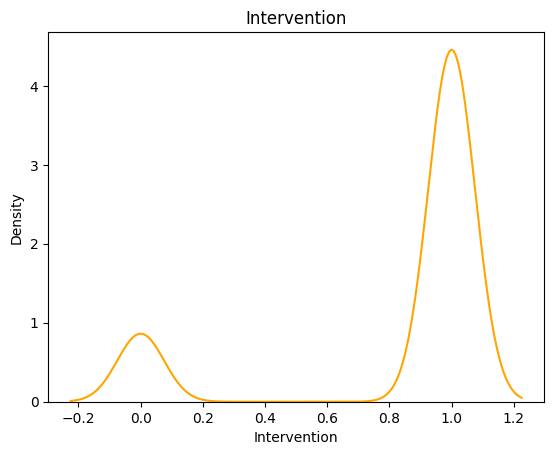

In [ ]:
bin_edges = np.arange(1, df['Intervention'].max()+1, 1)
#plot histogram 
sns.distplot(df['Intervention'], bins = bin_edges, color = 'orange');
plt.title("Intervention");
plt.xlabel("Intervention");

array([[<Axes: title={'center': 'Intervention'}>]], dtype=object)

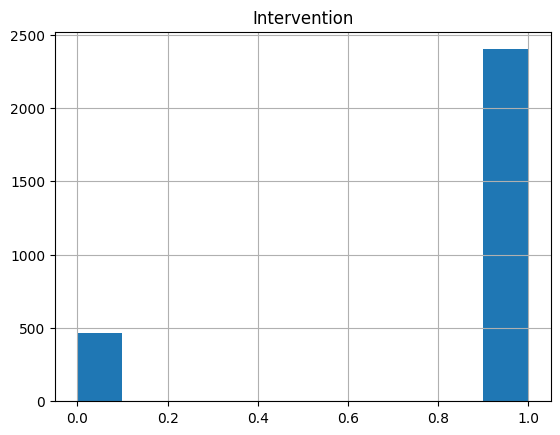

In [ ]:
df.hist(column="Intervention")

In [ ]:
df.corr()['Visceral_Fat_Volume_Litres'].sort_values()

CIGARETTES_CONSUMED_PER_DAY       -0.045181
WALK_DURATION_PER_DAY_MINUTES     -0.039365
SMOKING_STATUS                    -0.004736
COMPUTER_USE_TIME_PER_DAY_HOURS    0.058153
AGE_years                          0.067181
HEIGHT_cm                          0.103257
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.134248
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.185163
BMI                                0.590592
Intervention                       0.614585
WEIGHT_kg                          0.617770
WAIST_CIRCUMFERENCE_cm             0.638023
Visceral_Fat_Volume_Litres         1.000000
Name: Visceral_Fat_Volume_Litres, dtype: float64

<Axes: >

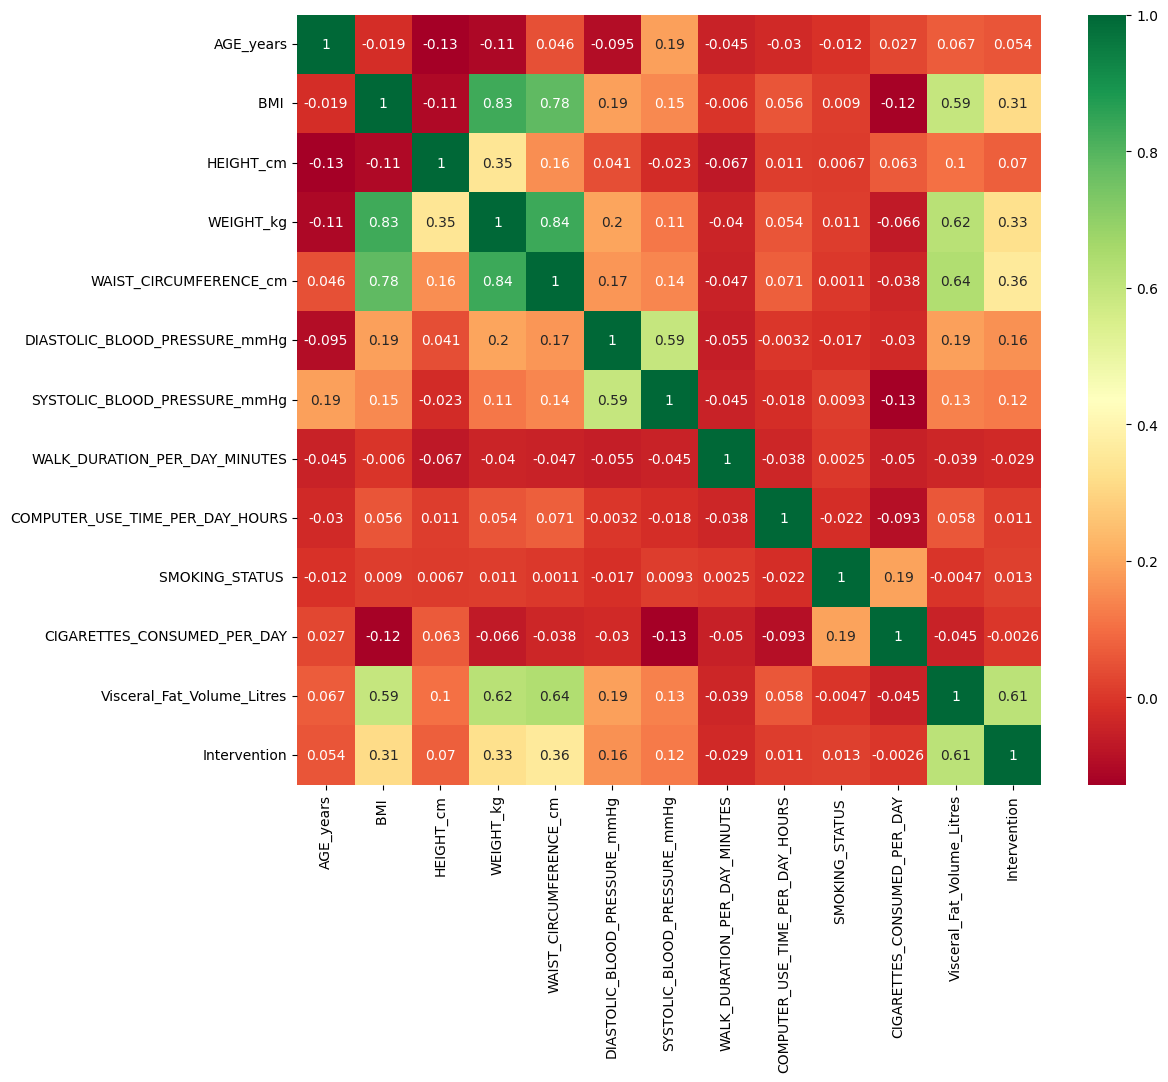

In [ ]:
plt.figure(figsize=(5,5))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

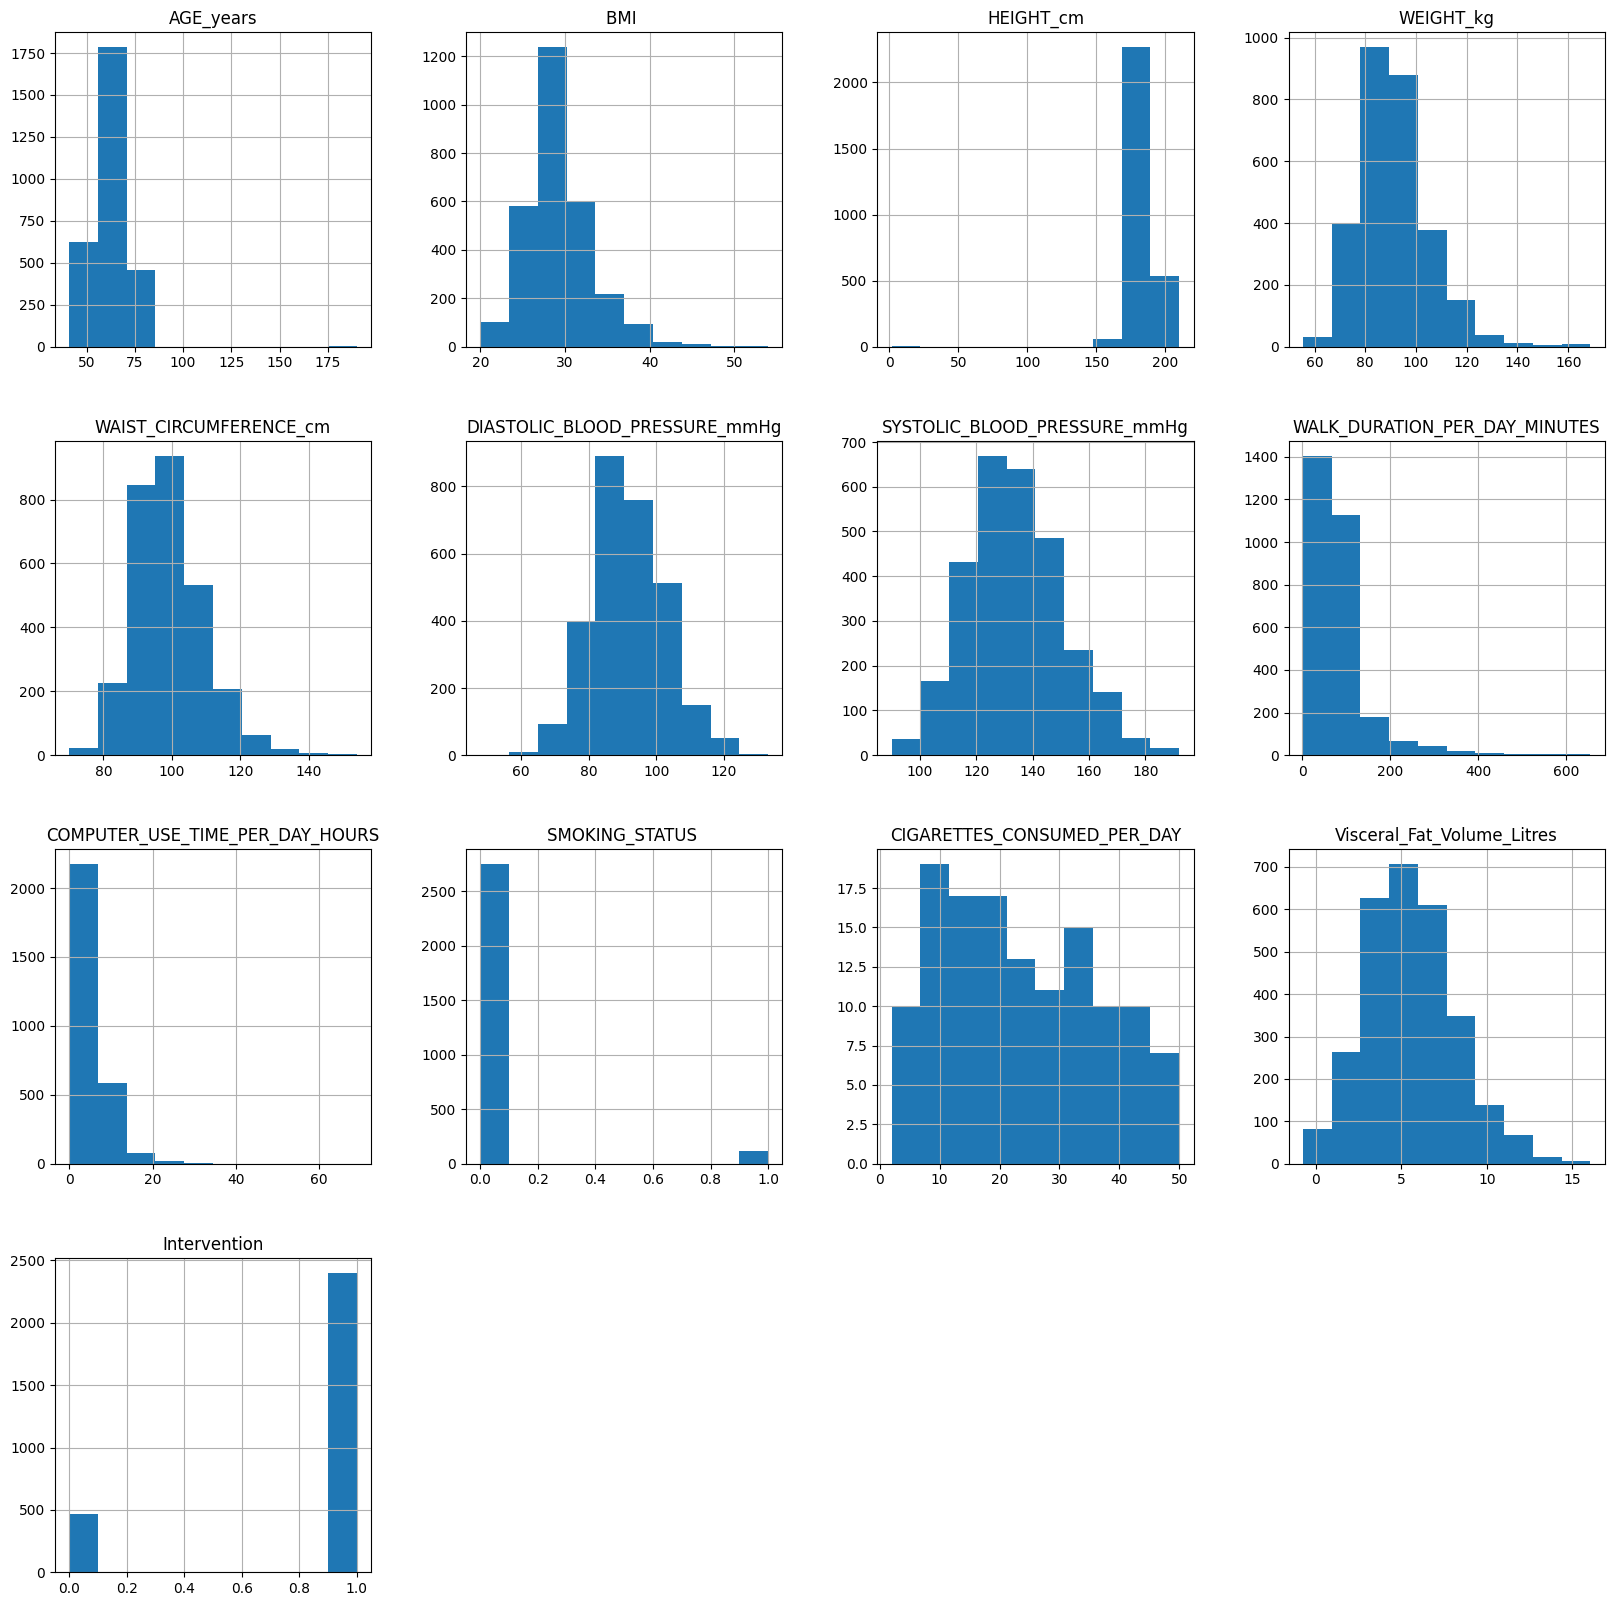

In [ ]:
p = df.hist(figsize = (20,20))

array([[<Axes: title={'center': 'AGE_years'}>]], dtype=object)

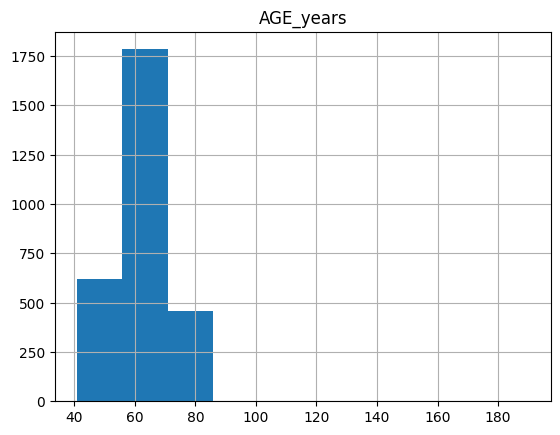

In [ ]:
df.hist(column="AGE_years")

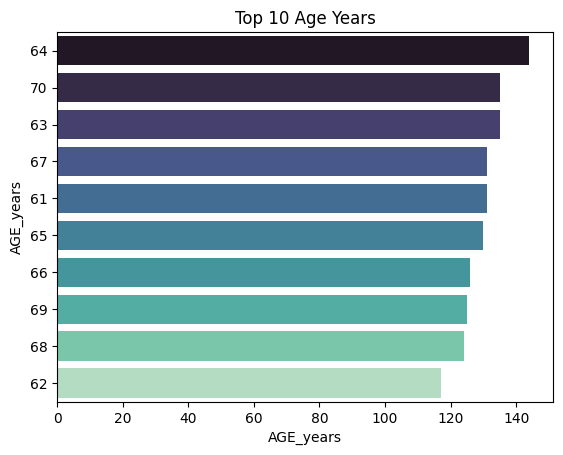

In [ ]:
age = df.AGE_years.value_counts()[0:10]
# Get the indexes of the Series
order = age.index
#plot a count plot using seaborn
sns.countplot(data = df , y= 'AGE_years' ,  order = order , palette= 'mako');
#plot title 
plt.title("Top 10 Age Years");
plt.xlabel('AGE_years');

array([[<Axes: title={'center': 'BMI '}>]], dtype=object)

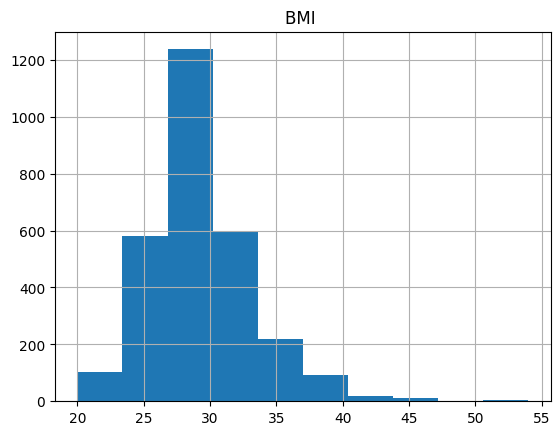

In [ ]:
df.hist(column="BMI ")

Text(0.5, 1.0, 'Top 10 BMI ')

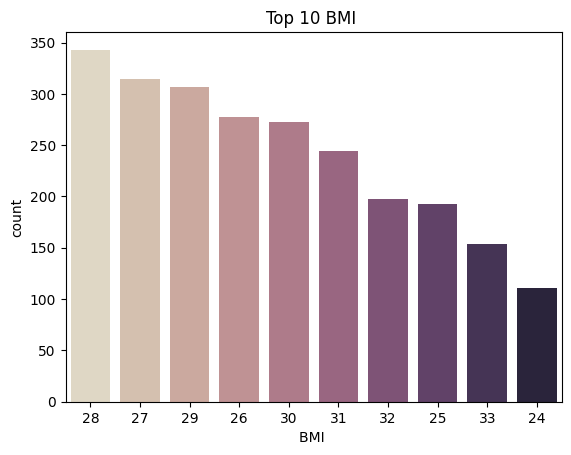

In [ ]:
freq = df["BMI "].value_counts()[0:10]
# Get the indexes of the Series
order = freq.index
#plot a count plot using seaborn
sns.countplot(data= df , x ="BMI ", order=order,  palette = "ch:s=-.2,r=.6");
#plot title 
plt.title("Top 10 BMI ")

array([[<Axes: title={'center': 'HEIGHT_cm'}>]], dtype=object)

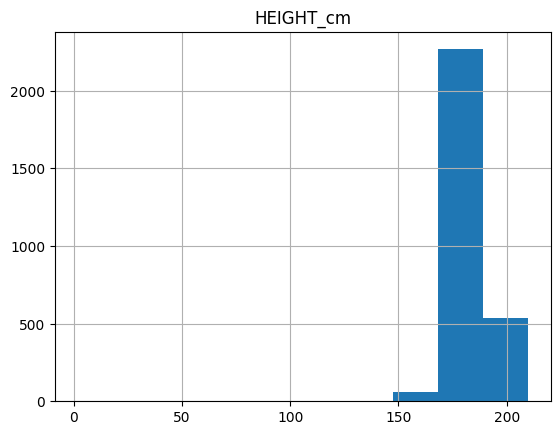

In [ ]:
df.hist(column="HEIGHT_cm")

<ipython-input-62-2c9978351186>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HEIGHT_cm'], bins = bin_edges, color = 'red');


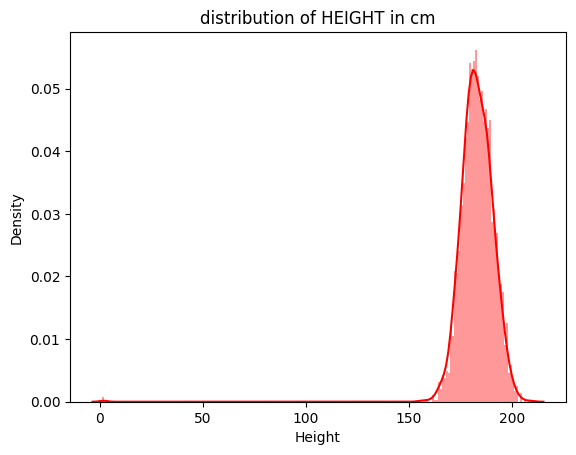

In [ ]:
bin_edges = np.arange(1, df['HEIGHT_cm'].max()+1, 1)
#plot histogram 
sns.distplot(df['HEIGHT_cm'], bins = bin_edges, color = 'red');
plt.title("distribution of HEIGHT in cm");
plt.xlabel("Height");

array([[<Axes: title={'center': 'WEIGHT_kg'}>]], dtype=object)

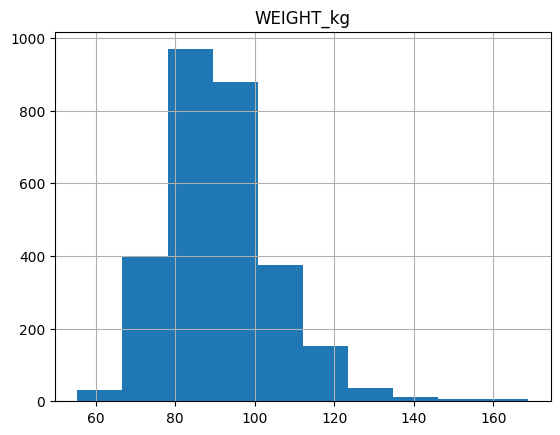

In [ ]:
df.hist(column="WEIGHT_kg")

array([[<Axes: title={'center': 'WAIST_CIRCUMFERENCE_cm'}>]], dtype=object)

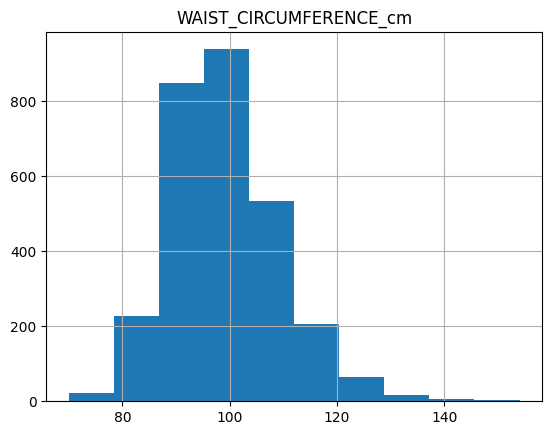

In [ ]:
df.hist(column="WAIST_CIRCUMFERENCE_cm")

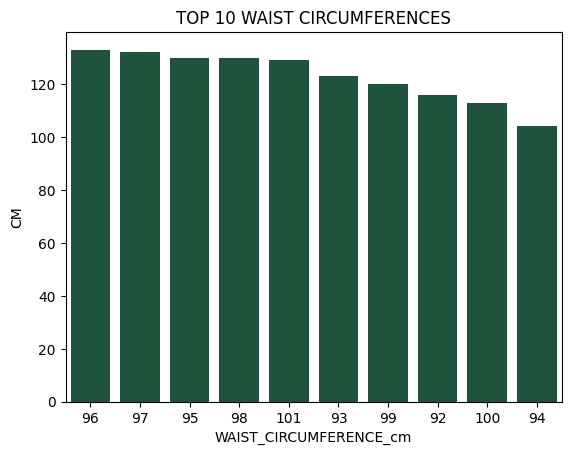

In [ ]:
freq = df['WAIST_CIRCUMFERENCE_cm'].value_counts()[0:10]
# Get the indexes of the Series
order = freq.index
#plot a count plot using seaborn
sns.countplot(data = df , x= 'WAIST_CIRCUMFERENCE_cm' ,  order = order , color= '#165C40');
#plot title
plt.title("TOP 10 WAIST CIRCUMFERENCES");
plt.ylabel('CM');
#plt.xticklabels(labels= freq.index,rotation=10);

array([[<Axes: title={'center': 'DIASTOLIC_BLOOD_PRESSURE_mmHg'}>]],
      dtype=object)

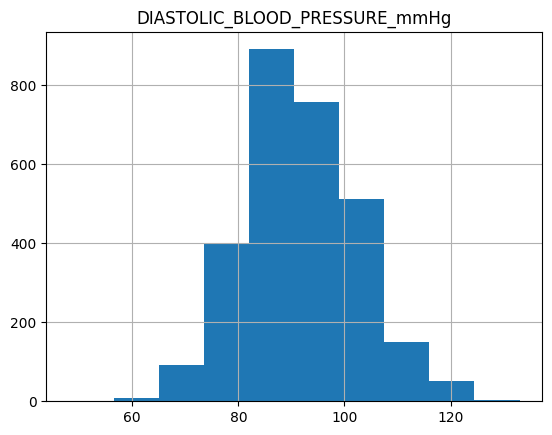

In [ ]:
df.hist(column="DIASTOLIC_BLOOD_PRESSURE_mmHg")

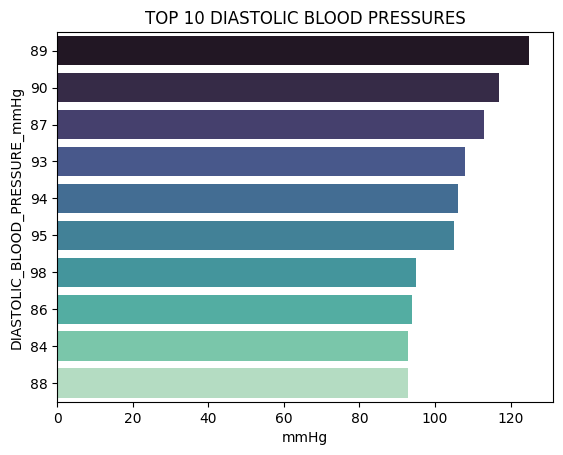

In [ ]:
age = df.DIASTOLIC_BLOOD_PRESSURE_mmHg.value_counts()[0:10]
# Get the indexes of the Series
order = age.index
#plot a count plot using seaborn
sns.countplot(data = df , y= 'DIASTOLIC_BLOOD_PRESSURE_mmHg' ,  order = order , palette= 'mako');
#plot title 
plt.title("TOP 10 DIASTOLIC BLOOD PRESSURES");
plt.xlabel('mmHg');

<ipython-input-68-e98b7a54a3c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SYSTOLIC_BLOOD_PRESSURE_mmHg'], bins = bin_edges, color = 'grey');


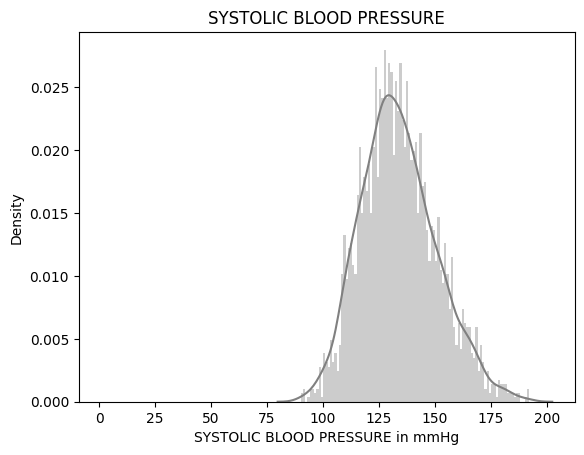

In [ ]:
bin_edges = np.arange(1, df['SYSTOLIC_BLOOD_PRESSURE_mmHg'].max()+1, 1)
#plot histogram 
sns.distplot(df['SYSTOLIC_BLOOD_PRESSURE_mmHg'], bins = bin_edges, color = 'grey');
plt.title("SYSTOLIC BLOOD PRESSURE");
plt.xlabel("SYSTOLIC BLOOD PRESSURE in mmHg");

array([[<Axes: title={'center': 'WALK_DURATION_PER_DAY_MINUTES'}>]],
      dtype=object)

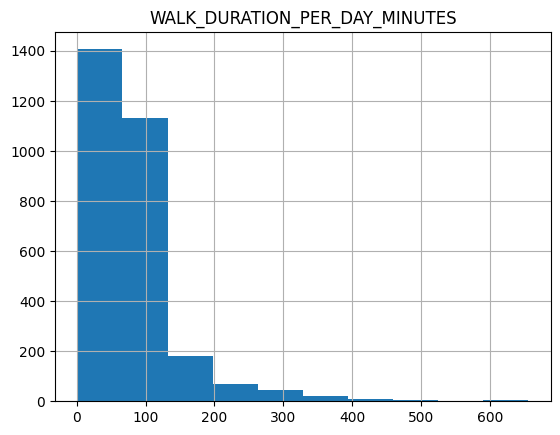

In [ ]:
df.hist(column="WALK_DURATION_PER_DAY_MINUTES")

Text(0.5, 1.0, 'WALK DURATION PER DAY IN MINUTES')

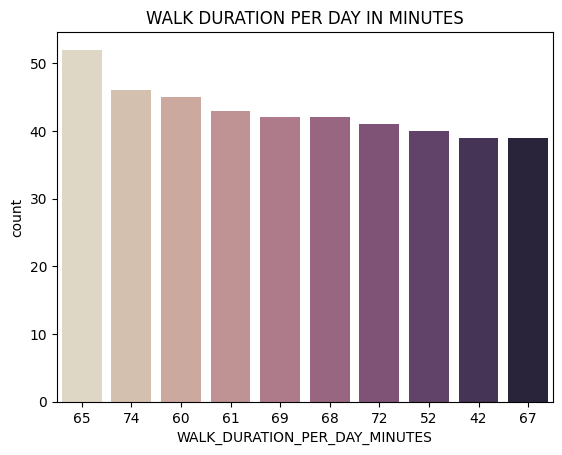

In [ ]:
freq = df["WALK_DURATION_PER_DAY_MINUTES"].value_counts()[0:10]
# Get the indexes of the Series
order = freq.index
#plot a count plot using seaborn
sns.countplot(data= df , x ="WALK_DURATION_PER_DAY_MINUTES", order=order,  palette = "ch:s=-.2,r=.6");
#plot title 
plt.title("WALK DURATION PER DAY IN MINUTES")

<ipython-input-71-e9f0ea6bc90b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['COMPUTER_USE_TIME_PER_DAY_HOURS'], bins = bin_edges, color = 'green');


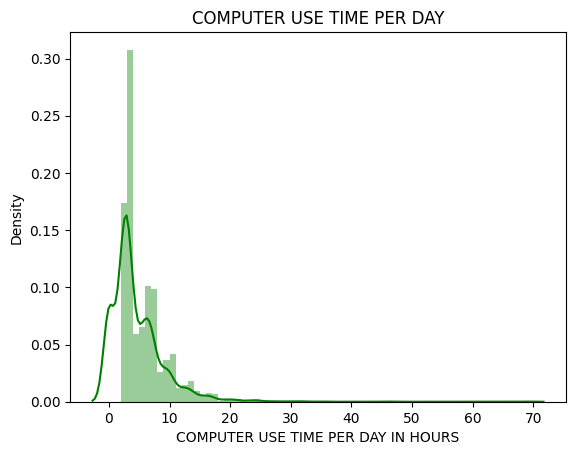

In [ ]:
bin_edges = np.arange(1, df['COMPUTER_USE_TIME_PER_DAY_HOURS'].max()+1, 1)
#plot histogram 
sns.distplot(df['COMPUTER_USE_TIME_PER_DAY_HOURS'], bins = bin_edges, color = 'green');
plt.title("COMPUTER USE TIME PER DAY");
plt.xlabel("COMPUTER USE TIME PER DAY IN HOURS");

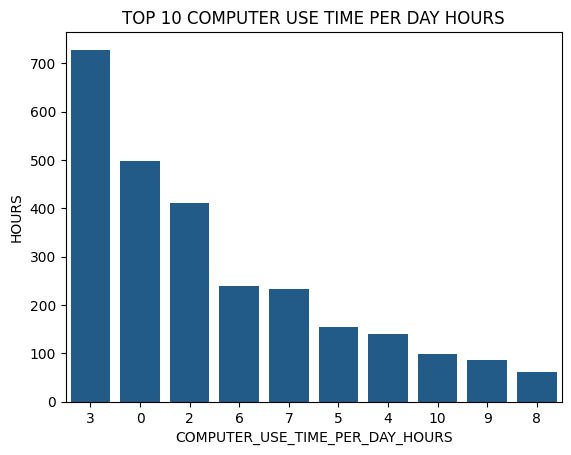

In [ ]:
freq = df['COMPUTER_USE_TIME_PER_DAY_HOURS'].value_counts()[0:10]
# Get the indexes of the Series
order = freq.index
#plot a count plot using seaborn
sns.countplot(data = df , x= 'COMPUTER_USE_TIME_PER_DAY_HOURS' ,  order = order , color= '#115D99');
#plot title
plt.title("TOP 10 COMPUTER USE TIME PER DAY HOURS");
plt.ylabel('HOURS');
#plt.xticklabels(labels= freq.index,rotation=10);

Text(0.5, 1.0, 'Smokers VS Non-Smokers')

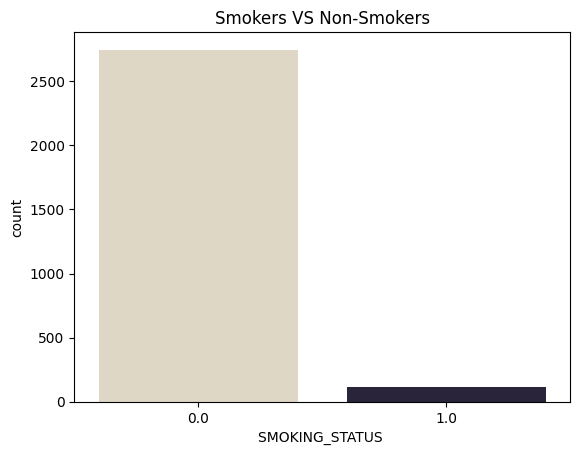

In [ ]:
smokers = df["SMOKING_STATUS "].value_counts()
# Get the indexes of the Series
order = smokers.index
#plot a count plot using seaborn
sns.countplot(data= df , x ="SMOKING_STATUS ", order=order,  palette = "ch:s=-.2,r=.6");
#plot title 
plt.title("Smokers VS Non-Smokers")

array([[<Axes: title={'center': 'SMOKING_STATUS '}>]], dtype=object)

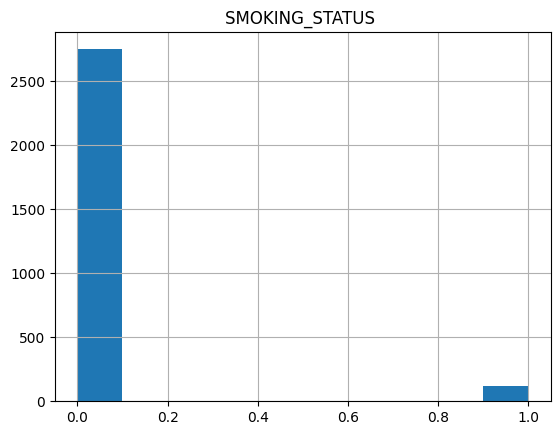

In [ ]:
df.hist(column="SMOKING_STATUS ")

In [ ]:
df["SMOKING_STATUS "].value_counts()
df['SMOKING_STATUS '].value_counts().to_frame()

SMOKING_STATUS 
0.0             2746
1.0              116

# ***No. of Non-Smokers; 2746 people***
# ***No. of Smokers; 117 people***

array([[<Axes: title={'center': 'CIGARETTES_CONSUMED_PER_DAY'}>]],
      dtype=object)

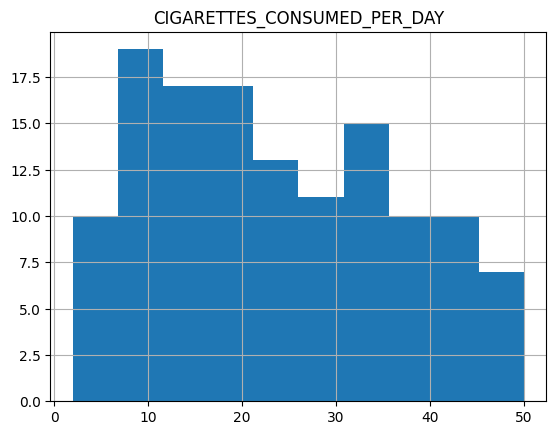

In [ ]:
df.hist(column="CIGARETTES_CONSUMED_PER_DAY")

# **Data Preprocessing & Wrangling / Preparation**








# ****Identifying & Dealing with missing values****








In [ ]:
df.dtypes

SUBJECT_ID                          object
SEX                                 object
AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
DISCONTINUED_NO_                    object
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Intervention                         int64
dtype: object

In [ ]:
df.isna().sum()

SUBJECT_ID                            0
SEX                                   0
AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg          5
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        2
DISCONTINUED_NO_                   2862
CIGARETTES_CONSUMED_PER_DAY        2735
Visceral_Fat_Volume_Litres            0
Intervention                          0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

SUBJECT_ID                          0.000000
SEX                                 0.000000
AGE_years                           0.000000
BMI                                 0.000000
HEIGHT_cm                           0.000000
WEIGHT_kg                           0.000000
WAIST_CIRCUMFERENCE_cm              0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg       0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg        0.174581
WALK_DURATION_PER_DAY_MINUTES       0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS     0.000000
SMOKING_STATUS                      0.069832
DISCONTINUED_NO_                   99.930168
CIGARETTES_CONSUMED_PER_DAY        95.495810
Visceral_Fat_Volume_Litres          0.000000
Intervention                        0.000000
dtype: float64

In [ ]:
df.corr()['CIGARETTES_CONSUMED_PER_DAY'].sort_values()

SYSTOLIC_BLOOD_PRESSURE_mmHg      -0.125817
BMI                               -0.119409
COMPUTER_USE_TIME_PER_DAY_HOURS   -0.092618
WEIGHT_kg                         -0.065508
WALK_DURATION_PER_DAY_MINUTES     -0.050235
Visceral_Fat_Volume_Litres        -0.045181
WAIST_CIRCUMFERENCE_cm            -0.037872
DIASTOLIC_BLOOD_PRESSURE_mmHg     -0.030374
Intervention                      -0.002560
AGE_years                          0.026637
HEIGHT_cm                          0.062702
SMOKING_STATUS                     0.190234
CIGARETTES_CONSUMED_PER_DAY        1.000000
Name: CIGARETTES_CONSUMED_PER_DAY, dtype: float64

In [ ]:
df.corr()['Visceral_Fat_Volume_Litres'].sort_values()

CIGARETTES_CONSUMED_PER_DAY       -0.045181
WALK_DURATION_PER_DAY_MINUTES     -0.039365
SMOKING_STATUS                    -0.004736
COMPUTER_USE_TIME_PER_DAY_HOURS    0.058153
AGE_years                          0.067181
HEIGHT_cm                          0.103257
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.134248
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.185163
BMI                                0.590592
Intervention                       0.614585
WEIGHT_kg                          0.617770
WAIST_CIRCUMFERENCE_cm             0.638023
Visceral_Fat_Volume_Litres         1.000000
Name: Visceral_Fat_Volume_Litres, dtype: float64

In [ ]:
df.corr()['Intervention'].sort_values()

WALK_DURATION_PER_DAY_MINUTES     -0.028925
CIGARETTES_CONSUMED_PER_DAY       -0.002560
COMPUTER_USE_TIME_PER_DAY_HOURS    0.011270
SMOKING_STATUS                     0.013125
AGE_years                          0.053986
HEIGHT_cm                          0.070450
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.121029
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.161169
BMI                                0.314937
WEIGHT_kg                          0.326917
WAIST_CIRCUMFERENCE_cm             0.359074
Visceral_Fat_Volume_Litres         0.614585
Intervention                       1.000000
Name: Intervention, dtype: float64

In [ ]:
#df.dropna(thresh=0.98*len(df),axis=1,inplace=True)
df.drop('DISCONTINUED_NO_', axis=1,inplace=True)

In [ ]:
df.isna().sum()

SUBJECT_ID                            0
SEX                                   0
AGE_years                             0
BMI                                   0
HEIGHT_cm                             0
WEIGHT_kg                             0
WAIST_CIRCUMFERENCE_cm                0
DIASTOLIC_BLOOD_PRESSURE_mmHg         0
SYSTOLIC_BLOOD_PRESSURE_mmHg          5
WALK_DURATION_PER_DAY_MINUTES         0
COMPUTER_USE_TIME_PER_DAY_HOURS       0
SMOKING_STATUS                        2
CIGARETTES_CONSUMED_PER_DAY        2735
Visceral_Fat_Volume_Litres            0
Intervention                          0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

SUBJECT_ID                          0.000000
SEX                                 0.000000
AGE_years                           0.000000
BMI                                 0.000000
HEIGHT_cm                           0.000000
WEIGHT_kg                           0.000000
WAIST_CIRCUMFERENCE_cm              0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg       0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg        0.174581
WALK_DURATION_PER_DAY_MINUTES       0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS     0.000000
SMOKING_STATUS                      0.069832
CIGARETTES_CONSUMED_PER_DAY        95.495810
Visceral_Fat_Volume_Litres          0.000000
Intervention                        0.000000
dtype: float64

In [ ]:
df.dtypes

SUBJECT_ID                          object
SEX                                 object
AGE_years                            int64
BMI                                  int64
HEIGHT_cm                          float64
WEIGHT_kg                          float64
WAIST_CIRCUMFERENCE_cm               int64
DIASTOLIC_BLOOD_PRESSURE_mmHg        int64
SYSTOLIC_BLOOD_PRESSURE_mmHg       float64
WALK_DURATION_PER_DAY_MINUTES        int64
COMPUTER_USE_TIME_PER_DAY_HOURS      int64
SMOKING_STATUS                     float64
CIGARETTES_CONSUMED_PER_DAY        float64
Visceral_Fat_Volume_Litres         float64
Intervention                         int64
dtype: object

In [ ]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
numeric_columns

Index(['AGE_years', 'BMI ', 'HEIGHT_cm', 'WEIGHT_kg', 'WAIST_CIRCUMFERENCE_cm',
       'DIASTOLIC_BLOOD_PRESSURE_mmHg', 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
       'WALK_DURATION_PER_DAY_MINUTES', 'COMPUTER_USE_TIME_PER_DAY_HOURS',
       'SMOKING_STATUS ', 'CIGARETTES_CONSUMED_PER_DAY',
       'Visceral_Fat_Volume_Litres', 'Intervention'],
      dtype='object')

In [ ]:
numeric1= df.select_dtypes(include=np.number).columns.tolist()
numeric1.remove('SMOKING_STATUS ')
numeric1.remove('CIGARETTES_CONSUMED_PER_DAY')
numeric1

['AGE_years',
 'BMI ',
 'HEIGHT_cm',
 'WEIGHT_kg',
 'WAIST_CIRCUMFERENCE_cm',
 'DIASTOLIC_BLOOD_PRESSURE_mmHg',
 'SYSTOLIC_BLOOD_PRESSURE_mmHg',
 'WALK_DURATION_PER_DAY_MINUTES',
 'COMPUTER_USE_TIME_PER_DAY_HOURS',
 'Visceral_Fat_Volume_Litres',
 'Intervention']

In [ ]:
df[numeric1] = df[numeric1].fillna(df.mean())

<ipython-input-89-d48e639b309c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[numeric1] = df[numeric1].fillna(df.mean())


In [ ]:
df.isna().sum()/len(df)*100

SUBJECT_ID                          0.000000
SEX                                 0.000000
AGE_years                           0.000000
BMI                                 0.000000
HEIGHT_cm                           0.000000
WEIGHT_kg                           0.000000
WAIST_CIRCUMFERENCE_cm              0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg       0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg        0.000000
WALK_DURATION_PER_DAY_MINUTES       0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS     0.000000
SMOKING_STATUS                      0.069832
CIGARETTES_CONSUMED_PER_DAY        95.495810
Visceral_Fat_Volume_Litres          0.000000
Intervention                        0.000000
dtype: float64

In [ ]:
df['CIGARETTES_CONSUMED_PER_DAY'] = df['CIGARETTES_CONSUMED_PER_DAY'].fillna(0)

In [ ]:
df.isna().sum()/len(df)*100

SUBJECT_ID                         0.000000
SEX                                0.000000
AGE_years                          0.000000
BMI                                0.000000
HEIGHT_cm                          0.000000
WEIGHT_kg                          0.000000
WAIST_CIRCUMFERENCE_cm             0.000000
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.000000
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.000000
WALK_DURATION_PER_DAY_MINUTES      0.000000
COMPUTER_USE_TIME_PER_DAY_HOURS    0.000000
SMOKING_STATUS                     0.069832
CIGARETTES_CONSUMED_PER_DAY        0.000000
Visceral_Fat_Volume_Litres         0.000000
Intervention                       0.000000
dtype: float64

In [ ]:
#object_columns = df.select_dtypes(include=np.object).columns.tolist()
#object_columns
#df[object_columns] = df[boolean_columns].astype('bool')


In [ ]:
df['SMOKING_STATUS '] = df['SMOKING_STATUS '].astype('bool')
boolean_columns = df.select_dtypes(include=np.bool).columns.tolist()
boolean_columns

<ipython-input-94-02fe6e152363>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boolean_columns = df.select_dtypes(include=np.bool).columns.tolist()


['SMOKING_STATUS ']

In [ ]:
df[boolean_columns].fillna(df.mode())

SMOKING_STATUS 
0               False
1               False
2               False
3               False
4               False
...               ...
2859            False
2860            False
2861            False
2862            False
2863            False

[2864 rows x 1 columns]

In [ ]:
df['SMOKING_STATUS '] = df['SMOKING_STATUS '].astype('int')

In [ ]:
df.drop('SUBJECT_ID', axis=1,inplace=True)
df.drop('SEX',axis =1,inplace=True)

In [ ]:
df.isna().sum()/len(df)*100

AGE_years                          0.0
BMI                                0.0
HEIGHT_cm                          0.0
WEIGHT_kg                          0.0
WAIST_CIRCUMFERENCE_cm             0.0
DIASTOLIC_BLOOD_PRESSURE_mmHg      0.0
SYSTOLIC_BLOOD_PRESSURE_mmHg       0.0
WALK_DURATION_PER_DAY_MINUTES      0.0
COMPUTER_USE_TIME_PER_DAY_HOURS    0.0
SMOKING_STATUS                     0.0
CIGARETTES_CONSUMED_PER_DAY        0.0
Visceral_Fat_Volume_Litres         0.0
Intervention                       0.0
dtype: float64

In [ ]:
df.head()

AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  WAIST_CIRCUMFERENCE_cm  \
0         47    46      187.0     152.24                     154   
1         52    54      182.0     167.36                     139   
2         62    28      175.0      82.92                      93   
3         56    26        1.8      76.45                      85   
4         48    25        1.7      65.36                      84   

   DIASTOLIC_BLOOD_PRESSURE_mmHg  SYSTOLIC_BLOOD_PRESSURE_mmHg  \
0                            133                         178.0   
1                            111                         187.0   
2                            118                         160.0   
3                             91                         139.0   
4                             76                          98.0   

   WALK_DURATION_PER_DAY_MINUTES  COMPUTER_USE_TIME_PER_DAY_HOURS  \
0                             52                                7   
1                             50                                3   
2                             58                                6   
3                            151                                2   
4                            257                                6   

   SMOKING_STATUS   CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  \
0                0                          0.0                       -0.76   
1                0                          0.0                       -0.59   
2                0                          0.0                        0.59   
3                0                          0.0                        0.50   
4                0                          0.0                        0.39   

   Intervention  
0             0  
1             0  
2             0  
3             0  
4             0

In [ ]:
df.head()

AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  WAIST_CIRCUMFERENCE_cm  \
0         47    46      187.0     152.24                     154   
1         52    54      182.0     167.36                     139   
2         62    28      175.0      82.92                      93   
3         56    26        1.8      76.45                      85   
4         48    25        1.7      65.36                      84   

   DIASTOLIC_BLOOD_PRESSURE_mmHg  SYSTOLIC_BLOOD_PRESSURE_mmHg  \
0                            133                         178.0   
1                            111                         187.0   
2                            118                         160.0   
3                             91                         139.0   
4                             76                          98.0   

   WALK_DURATION_PER_DAY_MINUTES  COMPUTER_USE_TIME_PER_DAY_HOURS  \
0                             52                                7   
1                             50                                3   
2                             58                                6   
3                            151                                2   
4                            257                                6   

   SMOKING_STATUS   CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  \
0                0                          0.0                       -0.76   
1                0                          0.0                       -0.59   
2                0                          0.0                        0.59   
3                0                          0.0                        0.50   
4                0                          0.0                        0.39   

   Intervention  
0             0  
1             0  
2             0  
3             0  
4             0

In [ ]:
df.head()

AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  WAIST_CIRCUMFERENCE_cm  \
0         47    46      187.0     152.24                     154   
1         52    54      182.0     167.36                     139   
2         62    28      175.0      82.92                      93   
3         56    26        1.8      76.45                      85   
4         48    25        1.7      65.36                      84   

   DIASTOLIC_BLOOD_PRESSURE_mmHg  SYSTOLIC_BLOOD_PRESSURE_mmHg  \
0                            133                         178.0   
1                            111                         187.0   
2                            118                         160.0   
3                             91                         139.0   
4                             76                          98.0   

   WALK_DURATION_PER_DAY_MINUTES  COMPUTER_USE_TIME_PER_DAY_HOURS  \
0                             52                                7   
1                             50                                3   
2                             58                                6   
3                            151                                2   
4                            257                                6   

   SMOKING_STATUS   CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  \
0                0                          0.0                       -0.76   
1                0                          0.0                       -0.59   
2                0                          0.0                        0.59   
3                0                          0.0                        0.50   
4                0                          0.0                        0.39   

   Intervention  
0             0  
1             0  
2             0  
3             0  
4             0

array([[<Axes: title={'center': 'SMOKING_STATUS '}>]], dtype=object)

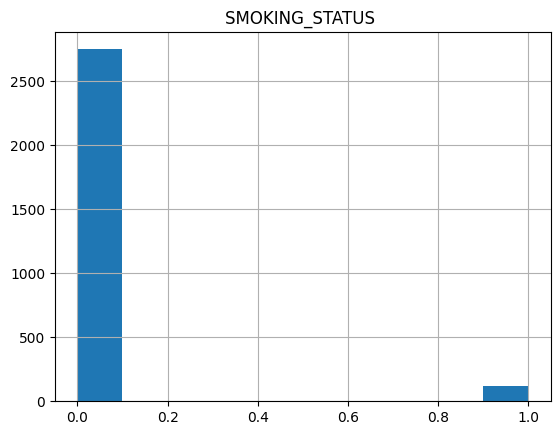

In [ ]:
df.hist(column="SMOKING_STATUS ")

<Axes: >

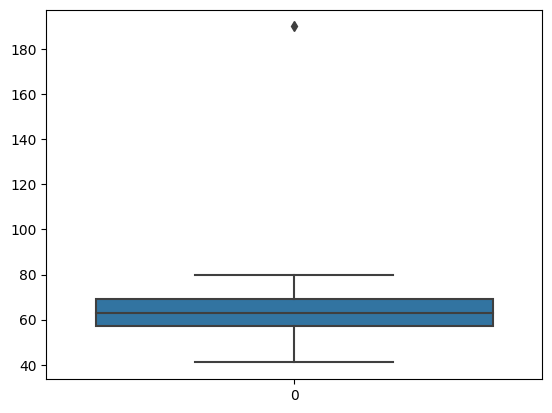

In [ ]:
sns.boxplot(df['AGE_years'])

In [ ]:
print(np.where(df['AGE_years']>100))

(array([1306]),)


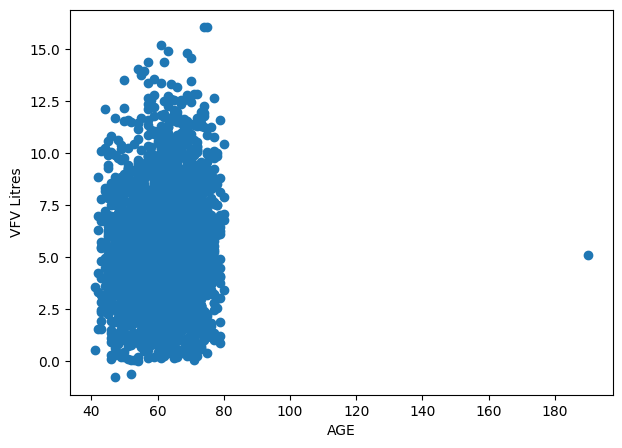

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['AGE_years'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('AGE')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

In [ ]:
print(np.where((df['AGE_years']>90) & (df['Visceral_Fat_Volume_Litres']>2.5)))

(array([1306]),)


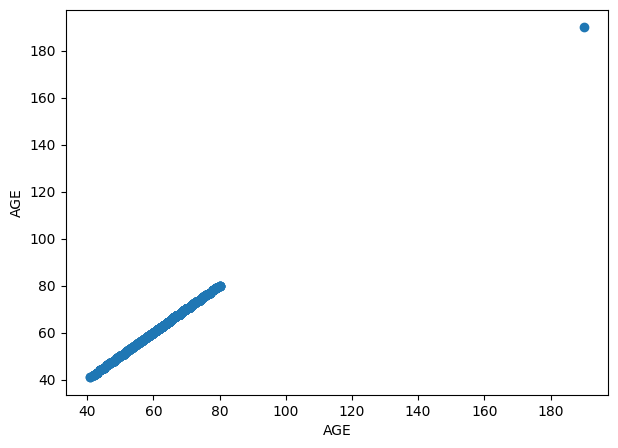

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['AGE_years'], df['AGE_years'])
  
# x-axis label
ax.set_xlabel('AGE')
  
# y-axis label
ax.set_ylabel('AGE')
plt.show()

<Axes: xlabel='AGE_years', ylabel='Visceral_Fat_Volume_Litres'>

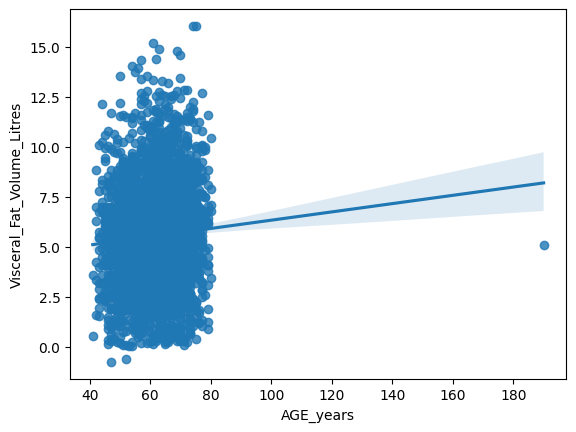

In [ ]:
sns.regplot(x='AGE_years', y='Visceral_Fat_Volume_Litres', data=df)

In [ ]:
# IQR
Q1 = np.percentile(df['AGE_years'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['AGE_years'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['AGE_years'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['AGE_years'] <= (Q1-1.5*IQR))


Old Shape:  (2864, 13)


<ipython-input-109-1cb68a19688f>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['AGE_years'], 25,
<ipython-input-109-1cb68a19688f>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['AGE_years'], 75,


In [ ]:
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)


New Shape:  (2863, 13)


<Axes: >

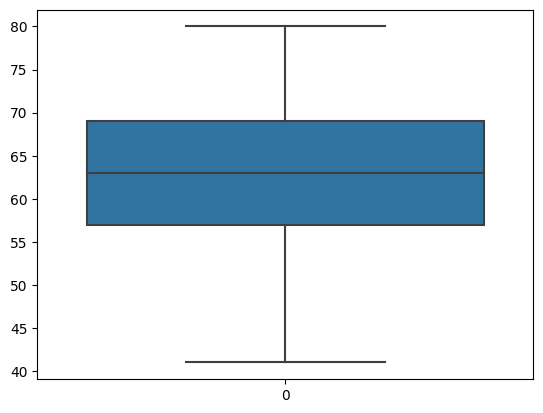

In [ ]:
sns.boxplot(df['AGE_years'])

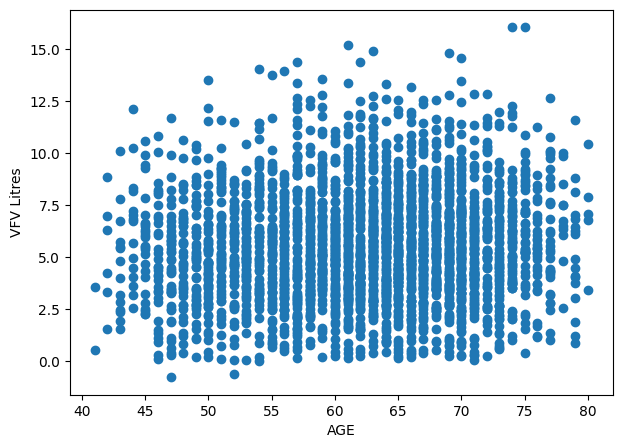

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['AGE_years'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('AGE')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: >

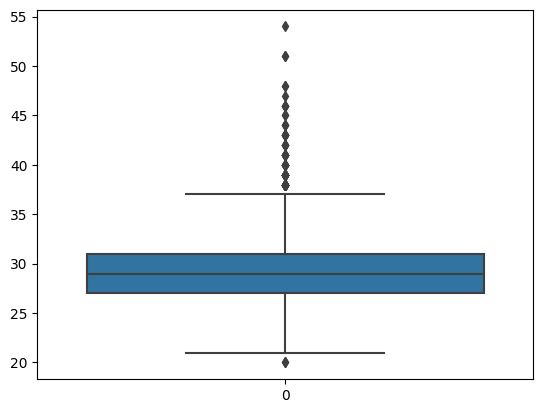

In [ ]:
sns.boxplot(df['BMI '])

<Axes: xlabel='BMI ', ylabel='Visceral_Fat_Volume_Litres'>

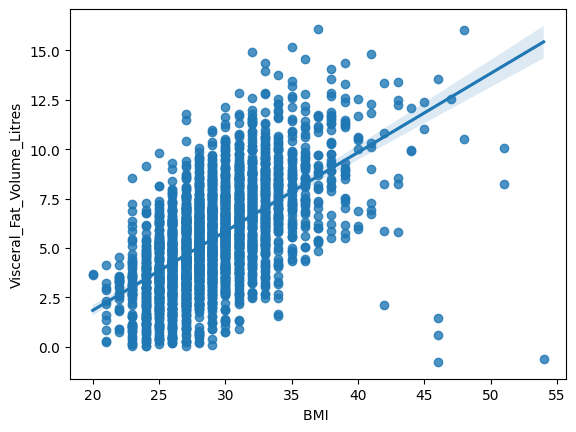

In [ ]:
sns.regplot(x='BMI ', y='Visceral_Fat_Volume_Litres', data=df)

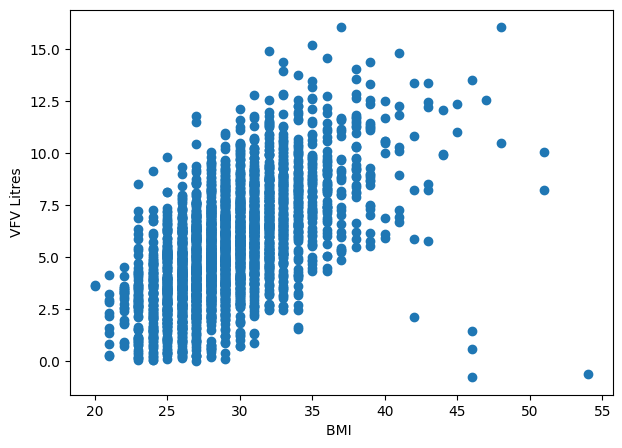

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['BMI '], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('BMI ')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: >

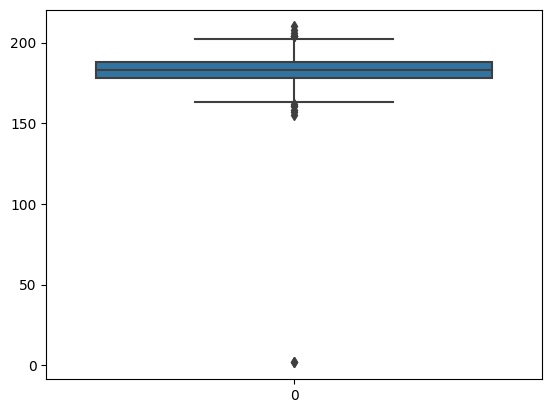

In [ ]:
sns.boxplot(df['HEIGHT_cm'])

In [ ]:
print(np.where(df['HEIGHT_cm']<140))

(array([3, 4]),)


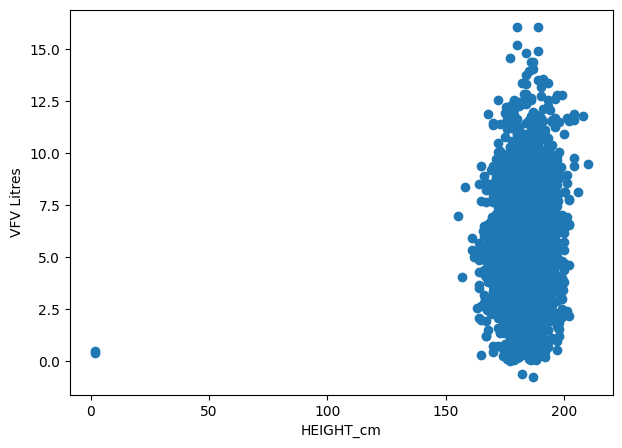

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['HEIGHT_cm'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('HEIGHT_cm')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

In [ ]:
print(np.where((df['HEIGHT_cm']<140) & (df['Visceral_Fat_Volume_Litres']>0.0)))

(array([3, 4]),)


<Axes: xlabel='HEIGHT_cm', ylabel='Visceral_Fat_Volume_Litres'>

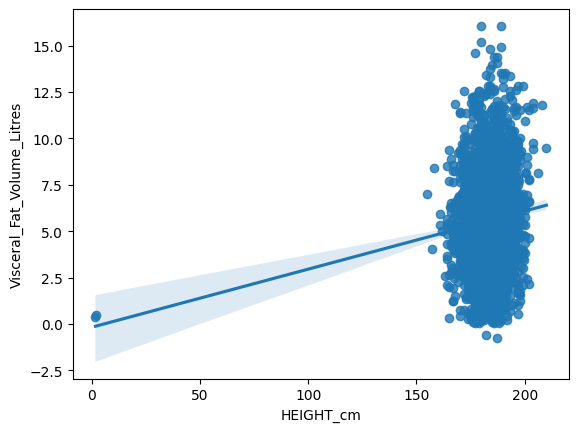

In [ ]:
sns.regplot(x='HEIGHT_cm', y='Visceral_Fat_Volume_Litres', data=df)

In [ ]:
df.drop(df.loc[df['HEIGHT_cm']<140].index, inplace=True)

<Axes: >

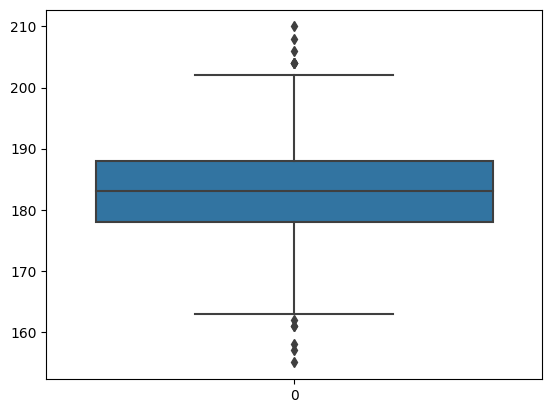

In [ ]:
sns.boxplot(df['HEIGHT_cm'])

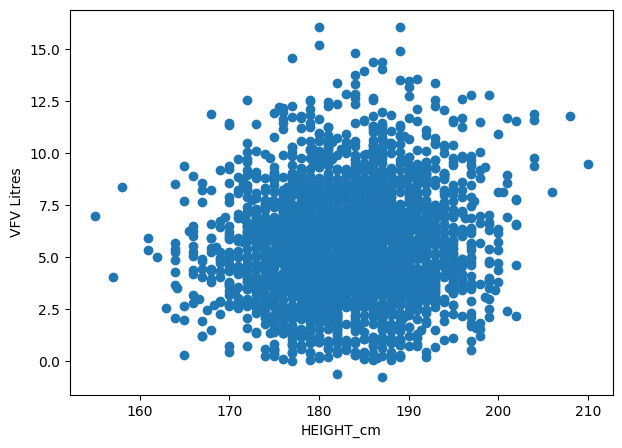

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['HEIGHT_cm'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('HEIGHT_cm')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: >

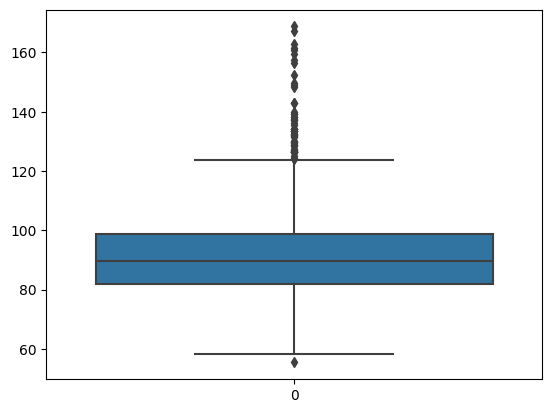

In [ ]:
sns.boxplot(df['WEIGHT_kg'])

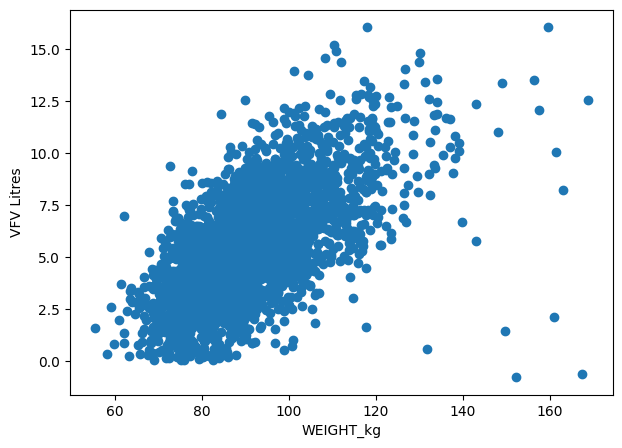

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['WEIGHT_kg'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('WEIGHT_kg')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: xlabel='WEIGHT_kg', ylabel='Visceral_Fat_Volume_Litres'>

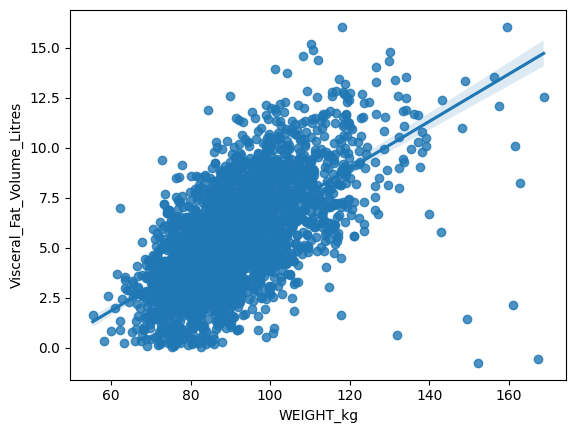

In [ ]:
sns.regplot(x='WEIGHT_kg', y='Visceral_Fat_Volume_Litres', data=df)

<Axes: >

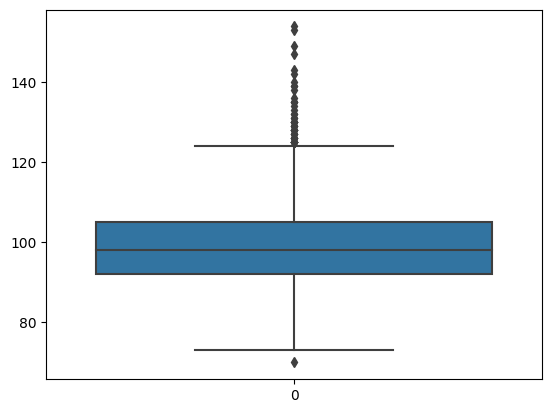

In [ ]:
sns.boxplot(df['WAIST_CIRCUMFERENCE_cm'])

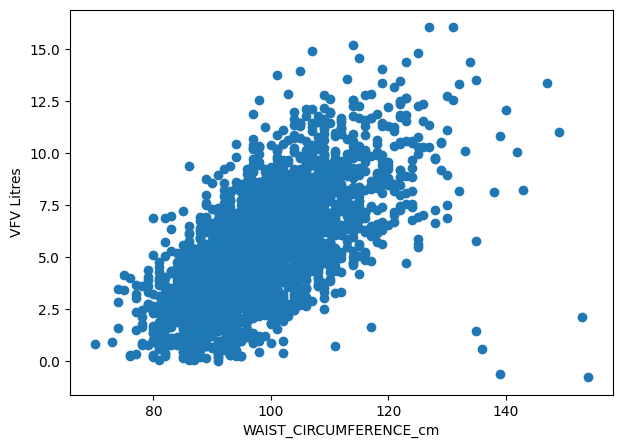

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['WAIST_CIRCUMFERENCE_cm'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('WAIST_CIRCUMFERENCE_cm')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: xlabel='WAIST_CIRCUMFERENCE_cm', ylabel='Visceral_Fat_Volume_Litres'>

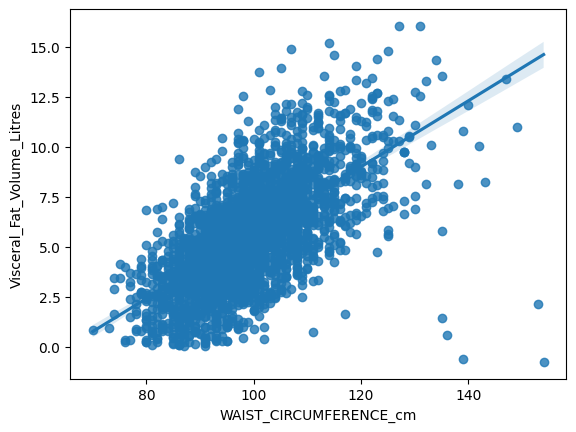

In [ ]:
sns.regplot(x='WAIST_CIRCUMFERENCE_cm', y='Visceral_Fat_Volume_Litres', data=df)

<Axes: >

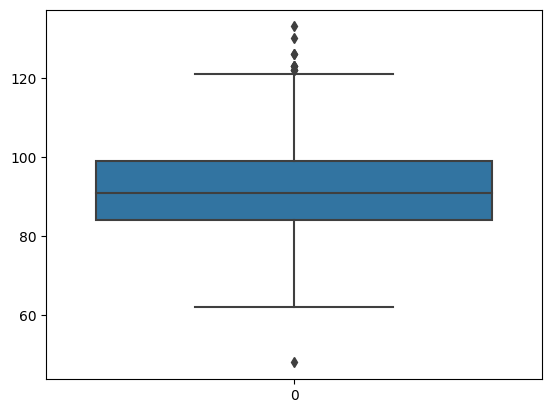

In [ ]:
sns.boxplot(df['DIASTOLIC_BLOOD_PRESSURE_mmHg'])

In [ ]:
print(np.where(df['DIASTOLIC_BLOOD_PRESSURE_mmHg']<60))

(array([536]),)


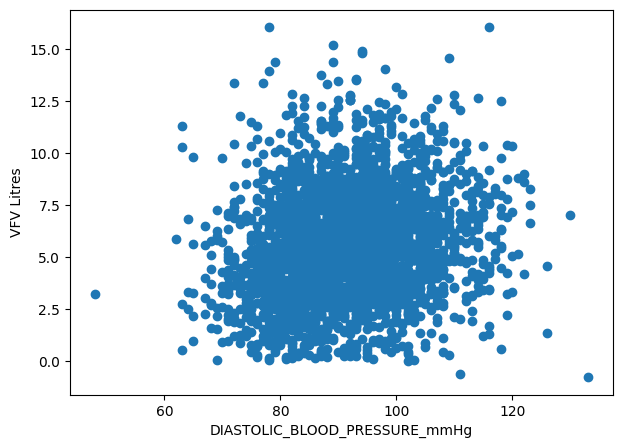

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['DIASTOLIC_BLOOD_PRESSURE_mmHg'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('DIASTOLIC_BLOOD_PRESSURE_mmHg')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

In [ ]:
print(np.where((df['DIASTOLIC_BLOOD_PRESSURE_mmHg']<60) & (df['Visceral_Fat_Volume_Litres']>0.0)))

(array([536]),)


<Axes: xlabel='DIASTOLIC_BLOOD_PRESSURE_mmHg', ylabel='Visceral_Fat_Volume_Litres'>

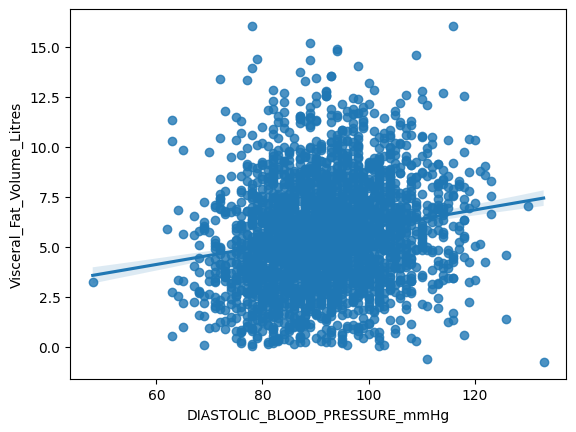

In [ ]:
sns.regplot(x='DIASTOLIC_BLOOD_PRESSURE_mmHg', y='Visceral_Fat_Volume_Litres', data=df)

In [ ]:
df.drop(df.loc[df['DIASTOLIC_BLOOD_PRESSURE_mmHg']<60].index, inplace=True)


<Axes: >

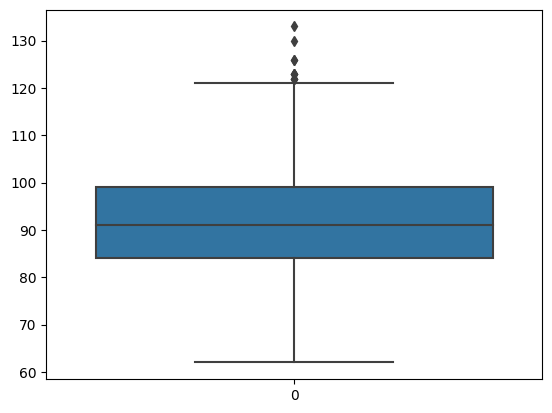

In [ ]:
sns.boxplot(df['DIASTOLIC_BLOOD_PRESSURE_mmHg'])

<Axes: xlabel='DIASTOLIC_BLOOD_PRESSURE_mmHg', ylabel='Visceral_Fat_Volume_Litres'>

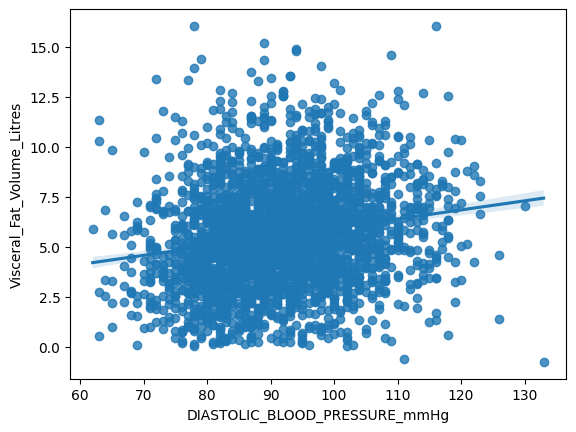

In [ ]:
sns.regplot(x='DIASTOLIC_BLOOD_PRESSURE_mmHg', y='Visceral_Fat_Volume_Litres', data=df)

<Axes: >

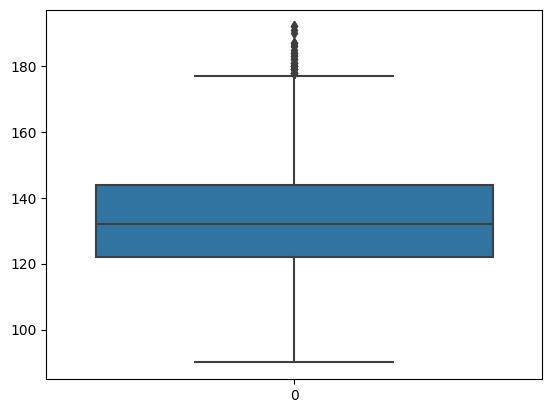

In [ ]:
sns.boxplot(df['SYSTOLIC_BLOOD_PRESSURE_mmHg'])

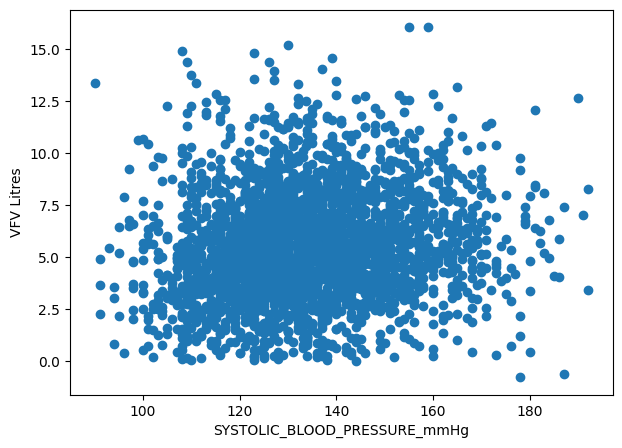

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['SYSTOLIC_BLOOD_PRESSURE_mmHg'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('SYSTOLIC_BLOOD_PRESSURE_mmHg')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: xlabel='SYSTOLIC_BLOOD_PRESSURE_mmHg', ylabel='Visceral_Fat_Volume_Litres'>

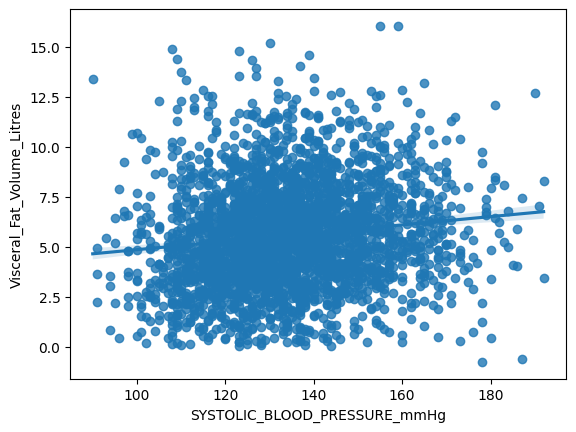

In [ ]:
sns.regplot(x='SYSTOLIC_BLOOD_PRESSURE_mmHg', y='Visceral_Fat_Volume_Litres', data=df)

<Axes: >

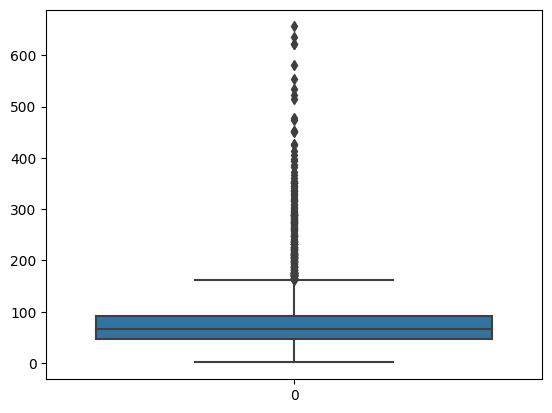

In [ ]:
sns.boxplot(df['WALK_DURATION_PER_DAY_MINUTES'])

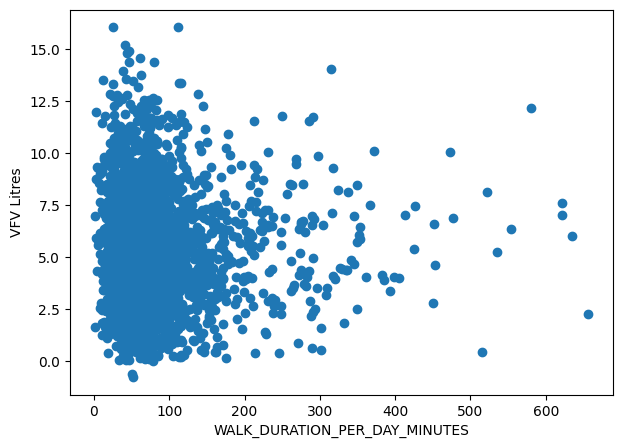

In [ ]:

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['WALK_DURATION_PER_DAY_MINUTES'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('WALK_DURATION_PER_DAY_MINUTES')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: xlabel='WALK_DURATION_PER_DAY_MINUTES', ylabel='Visceral_Fat_Volume_Litres'>

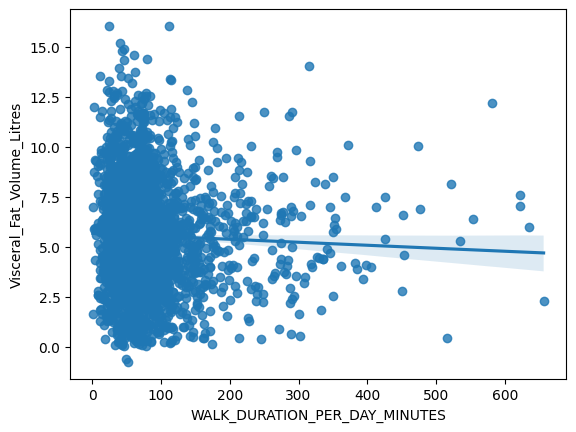

In [ ]:
sns.regplot(x='WALK_DURATION_PER_DAY_MINUTES', y='Visceral_Fat_Volume_Litres', data=df)

<Axes: >

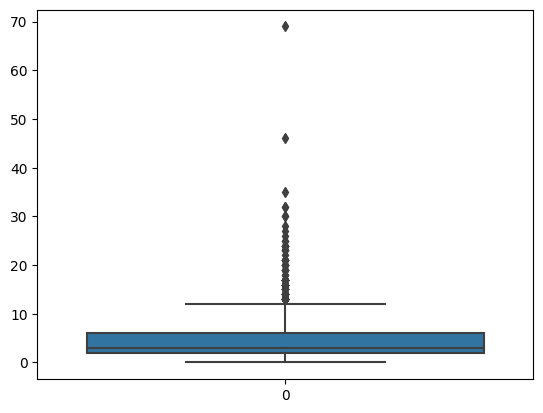

In [ ]:
sns.boxplot(df['COMPUTER_USE_TIME_PER_DAY_HOURS'])

In [ ]:
print(np.where(df['COMPUTER_USE_TIME_PER_DAY_HOURS']>40))

(array([1177, 1583]),)


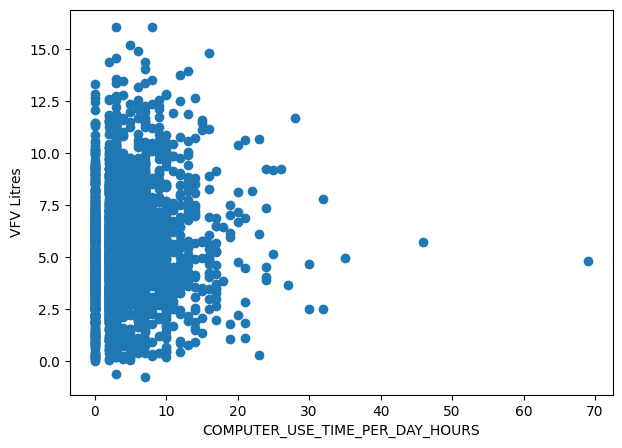

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['COMPUTER_USE_TIME_PER_DAY_HOURS'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('COMPUTER_USE_TIME_PER_DAY_HOURS')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

In [ ]:
print(np.where((df['COMPUTER_USE_TIME_PER_DAY_HOURS']>40) & (df['Visceral_Fat_Volume_Litres']>0.0)))

(array([1177, 1583]),)


<Axes: xlabel='COMPUTER_USE_TIME_PER_DAY_HOURS', ylabel='Visceral_Fat_Volume_Litres'>

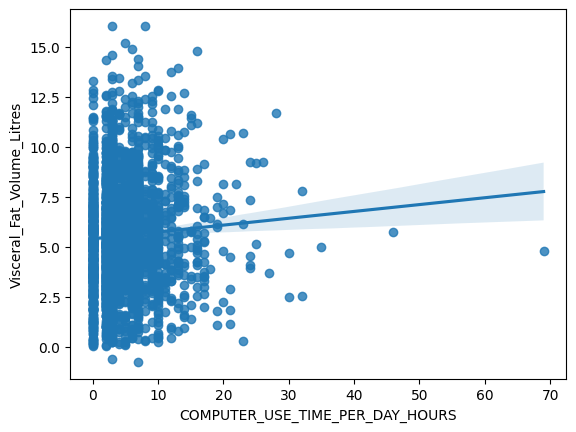

In [ ]:
sns.regplot(x='COMPUTER_USE_TIME_PER_DAY_HOURS', y='Visceral_Fat_Volume_Litres', data=df)

In [ ]:
df.drop(df.loc[df['COMPUTER_USE_TIME_PER_DAY_HOURS']>40].index, inplace=True)

<Axes: >

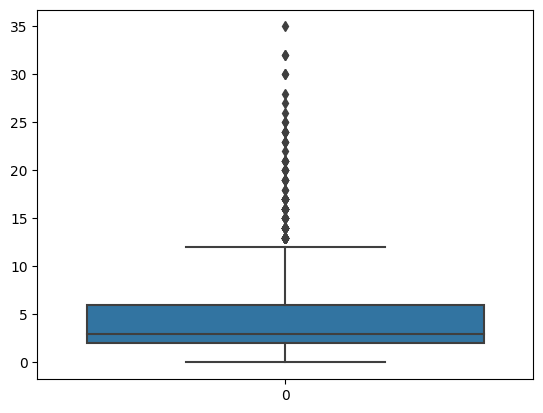

In [ ]:
sns.boxplot(df['COMPUTER_USE_TIME_PER_DAY_HOURS'])

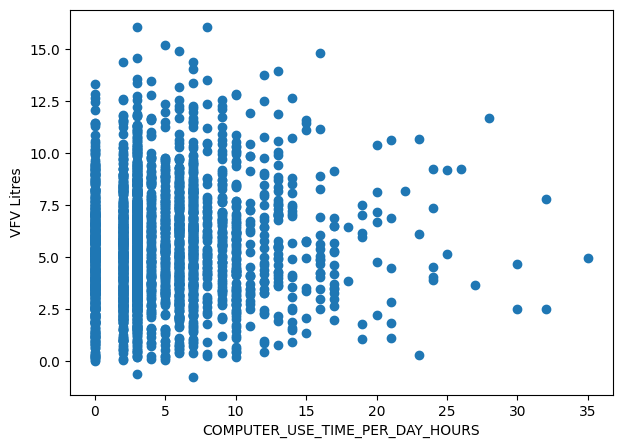

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['COMPUTER_USE_TIME_PER_DAY_HOURS'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('COMPUTER_USE_TIME_PER_DAY_HOURS')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: >

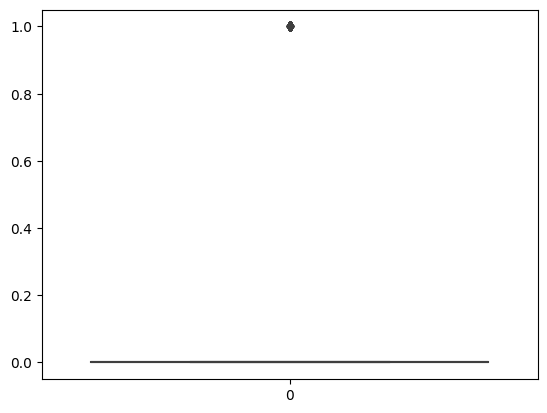

In [ ]:
sns.boxplot(df['SMOKING_STATUS '])

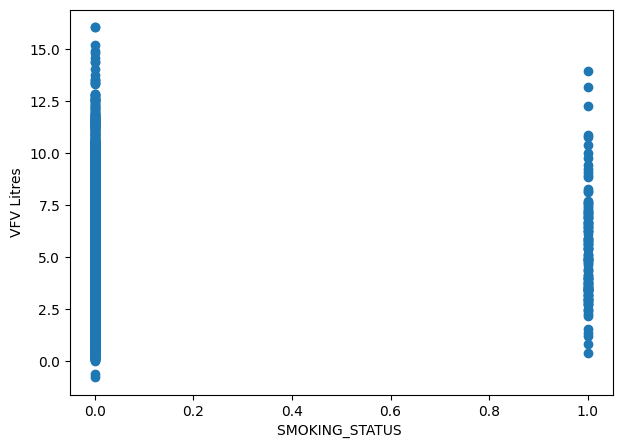

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['SMOKING_STATUS '], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('SMOKING_STATUS ')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: xlabel='SMOKING_STATUS ', ylabel='Visceral_Fat_Volume_Litres'>

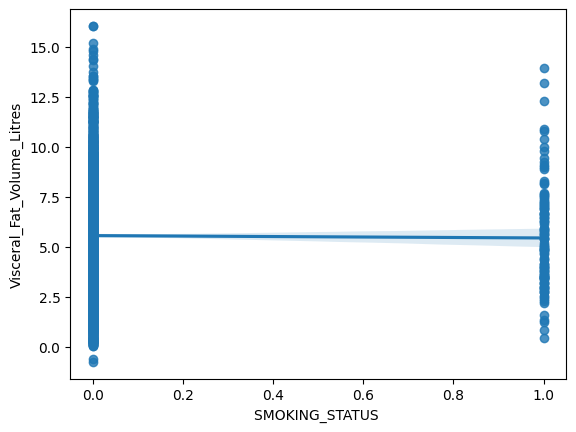

In [ ]:
sns.regplot(x='SMOKING_STATUS ', y='Visceral_Fat_Volume_Litres', data=df)

<Axes: >

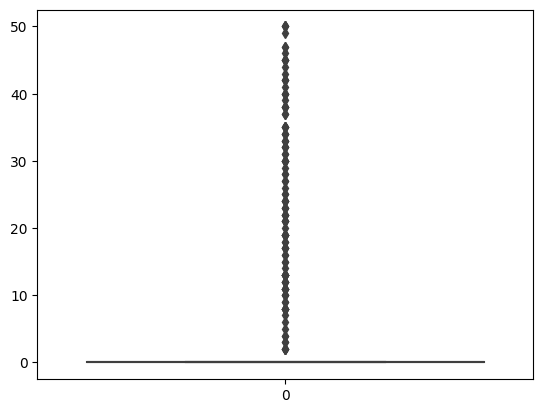

In [ ]:
sns.boxplot(df['CIGARETTES_CONSUMED_PER_DAY'])

<Axes: xlabel='SMOKING_STATUS ', ylabel='CIGARETTES_CONSUMED_PER_DAY'>

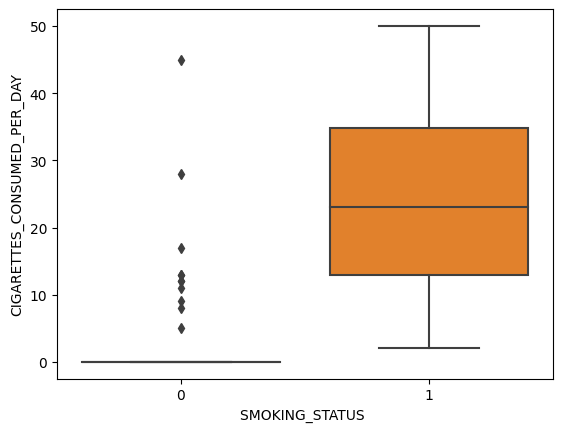

In [ ]:
sns.boxplot(x="SMOKING_STATUS ", y="CIGARETTES_CONSUMED_PER_DAY",data=df)

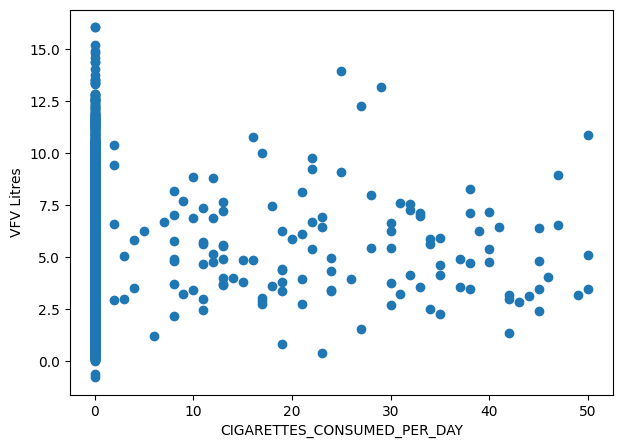

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(df['CIGARETTES_CONSUMED_PER_DAY'], df['Visceral_Fat_Volume_Litres'])
  
# x-axis label
ax.set_xlabel('CIGARETTES_CONSUMED_PER_DAY')
  
# y-axis label
ax.set_ylabel('VFV Litres')
plt.show()

<Axes: xlabel='CIGARETTES_CONSUMED_PER_DAY', ylabel='Visceral_Fat_Volume_Litres'>

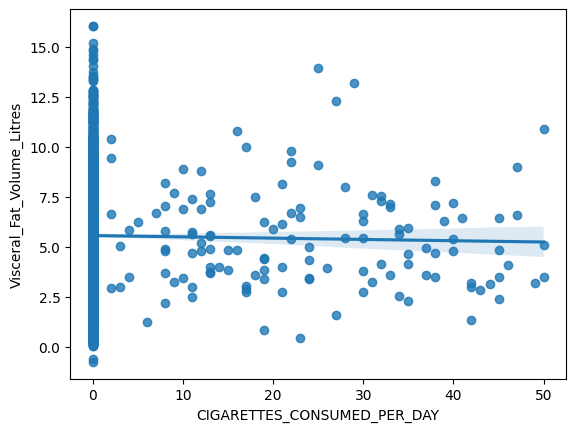

In [ ]:
sns.regplot(x='CIGARETTES_CONSUMED_PER_DAY', y='Visceral_Fat_Volume_Litres', data=df)

In [ ]:
df.head()

AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  WAIST_CIRCUMFERENCE_cm  \
0         47    46      187.0     152.24                     154   
1         52    54      182.0     167.36                     139   
2         62    28      175.0      82.92                      93   
5         70    27      180.0      76.57                      95   
6         65    21      189.0      63.37                      76   

   DIASTOLIC_BLOOD_PRESSURE_mmHg  SYSTOLIC_BLOOD_PRESSURE_mmHg  \
0                            133                         178.0   
1                            111                         187.0   
2                            118                         160.0   
5                             83                         127.0   
6                             93                         123.0   

   WALK_DURATION_PER_DAY_MINUTES  COMPUTER_USE_TIME_PER_DAY_HOURS  \
0                             52                                7   
1                             50                                3   
2                             58                                6   
5                             68                                5   
6                             85                                3   

   SMOKING_STATUS   CIGARETTES_CONSUMED_PER_DAY  Visceral_Fat_Volume_Litres  \
0                0                          0.0                       -0.76   
1                0                          0.0                       -0.59   
2                0                          0.0                        0.59   
5                0                          0.0                        0.27   
6                0                          0.0                        0.24   

   Intervention  
0             0  
1             0  
2             0  
5             0  
6             0

In [ ]:
df.drop('Visceral_Fat_Volume_Litres', axis=1,inplace=True)
df.head()

AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  WAIST_CIRCUMFERENCE_cm  \
0         47    46      187.0     152.24                     154   
1         52    54      182.0     167.36                     139   
2         62    28      175.0      82.92                      93   
5         70    27      180.0      76.57                      95   
6         65    21      189.0      63.37                      76   

   DIASTOLIC_BLOOD_PRESSURE_mmHg  SYSTOLIC_BLOOD_PRESSURE_mmHg  \
0                            133                         178.0   
1                            111                         187.0   
2                            118                         160.0   
5                             83                         127.0   
6                             93                         123.0   

   WALK_DURATION_PER_DAY_MINUTES  COMPUTER_USE_TIME_PER_DAY_HOURS  \
0                             52                                7   
1                             50                                3   
2                             58                                6   
5                             68                                5   
6                             85                                3   

   SMOKING_STATUS   CIGARETTES_CONSUMED_PER_DAY  Intervention  
0                0                          0.0             0  
1                0                          0.0             0  
2                0                          0.0             0  
5                0                          0.0             0  
6                0                          0.0             0

# ***Splitting the data set***

In [ ]:
X = df.drop(columns=['Intervention'])
X.head()

AGE_years  BMI   HEIGHT_cm  WEIGHT_kg  WAIST_CIRCUMFERENCE_cm  \
0         47    46      187.0     152.24                     154   
1         52    54      182.0     167.36                     139   
2         62    28      175.0      82.92                      93   
5         70    27      180.0      76.57                      95   
6         65    21      189.0      63.37                      76   

   DIASTOLIC_BLOOD_PRESSURE_mmHg  SYSTOLIC_BLOOD_PRESSURE_mmHg  \
0                            133                         178.0   
1                            111                         187.0   
2                            118                         160.0   
5                             83                         127.0   
6                             93                         123.0   

   WALK_DURATION_PER_DAY_MINUTES  COMPUTER_USE_TIME_PER_DAY_HOURS  \
0                             52                                7   
1                             50                                3   
2                             58                                6   
5                             68                                5   
6                             85                                3   

   SMOKING_STATUS   CIGARETTES_CONSUMED_PER_DAY  
0                0                          0.0  
1                0                          0.0  
2                0                          0.0  
5                0                          0.0  
6                0                          0.0

In [ ]:
Y = df.Intervention
Y

0       0
1       0
2       0
5       0
6       0
       ..
2859    1
2860    1
2861    1
2862    1
2863    1
Name: Intervention, Length: 2858, dtype: int64

# ***Standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.87395127,  4.30304405,  0.54540595, ...,  0.59804747,
        -0.20752275, -0.18851997],
       [-1.26130511,  6.36311354, -0.1475656 , ..., -0.3576247 ,
        -0.20752275, -0.18851997],
       [-0.03601279, -0.33211232, -1.11772577, ...,  0.35912943,
        -0.20752275, -0.18851997],
       ...,
       [-0.15854202,  1.47044849, -0.42475422, ...,  0.12021139,
        -0.20752275, -0.18851997],
       [ 1.55686723,  4.81806142,  0.82259457, ..., -0.3576247 ,
        -0.20752275, -0.18851997],
       [ 1.434338  ,  1.98546586, -0.42475422, ...,  0.83696551,
        -0.20752275, -0.18851997]])

# ***Decision Tree Model***

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set with standrization
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Split dataset into training set and test set without standrization
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7727272727272727


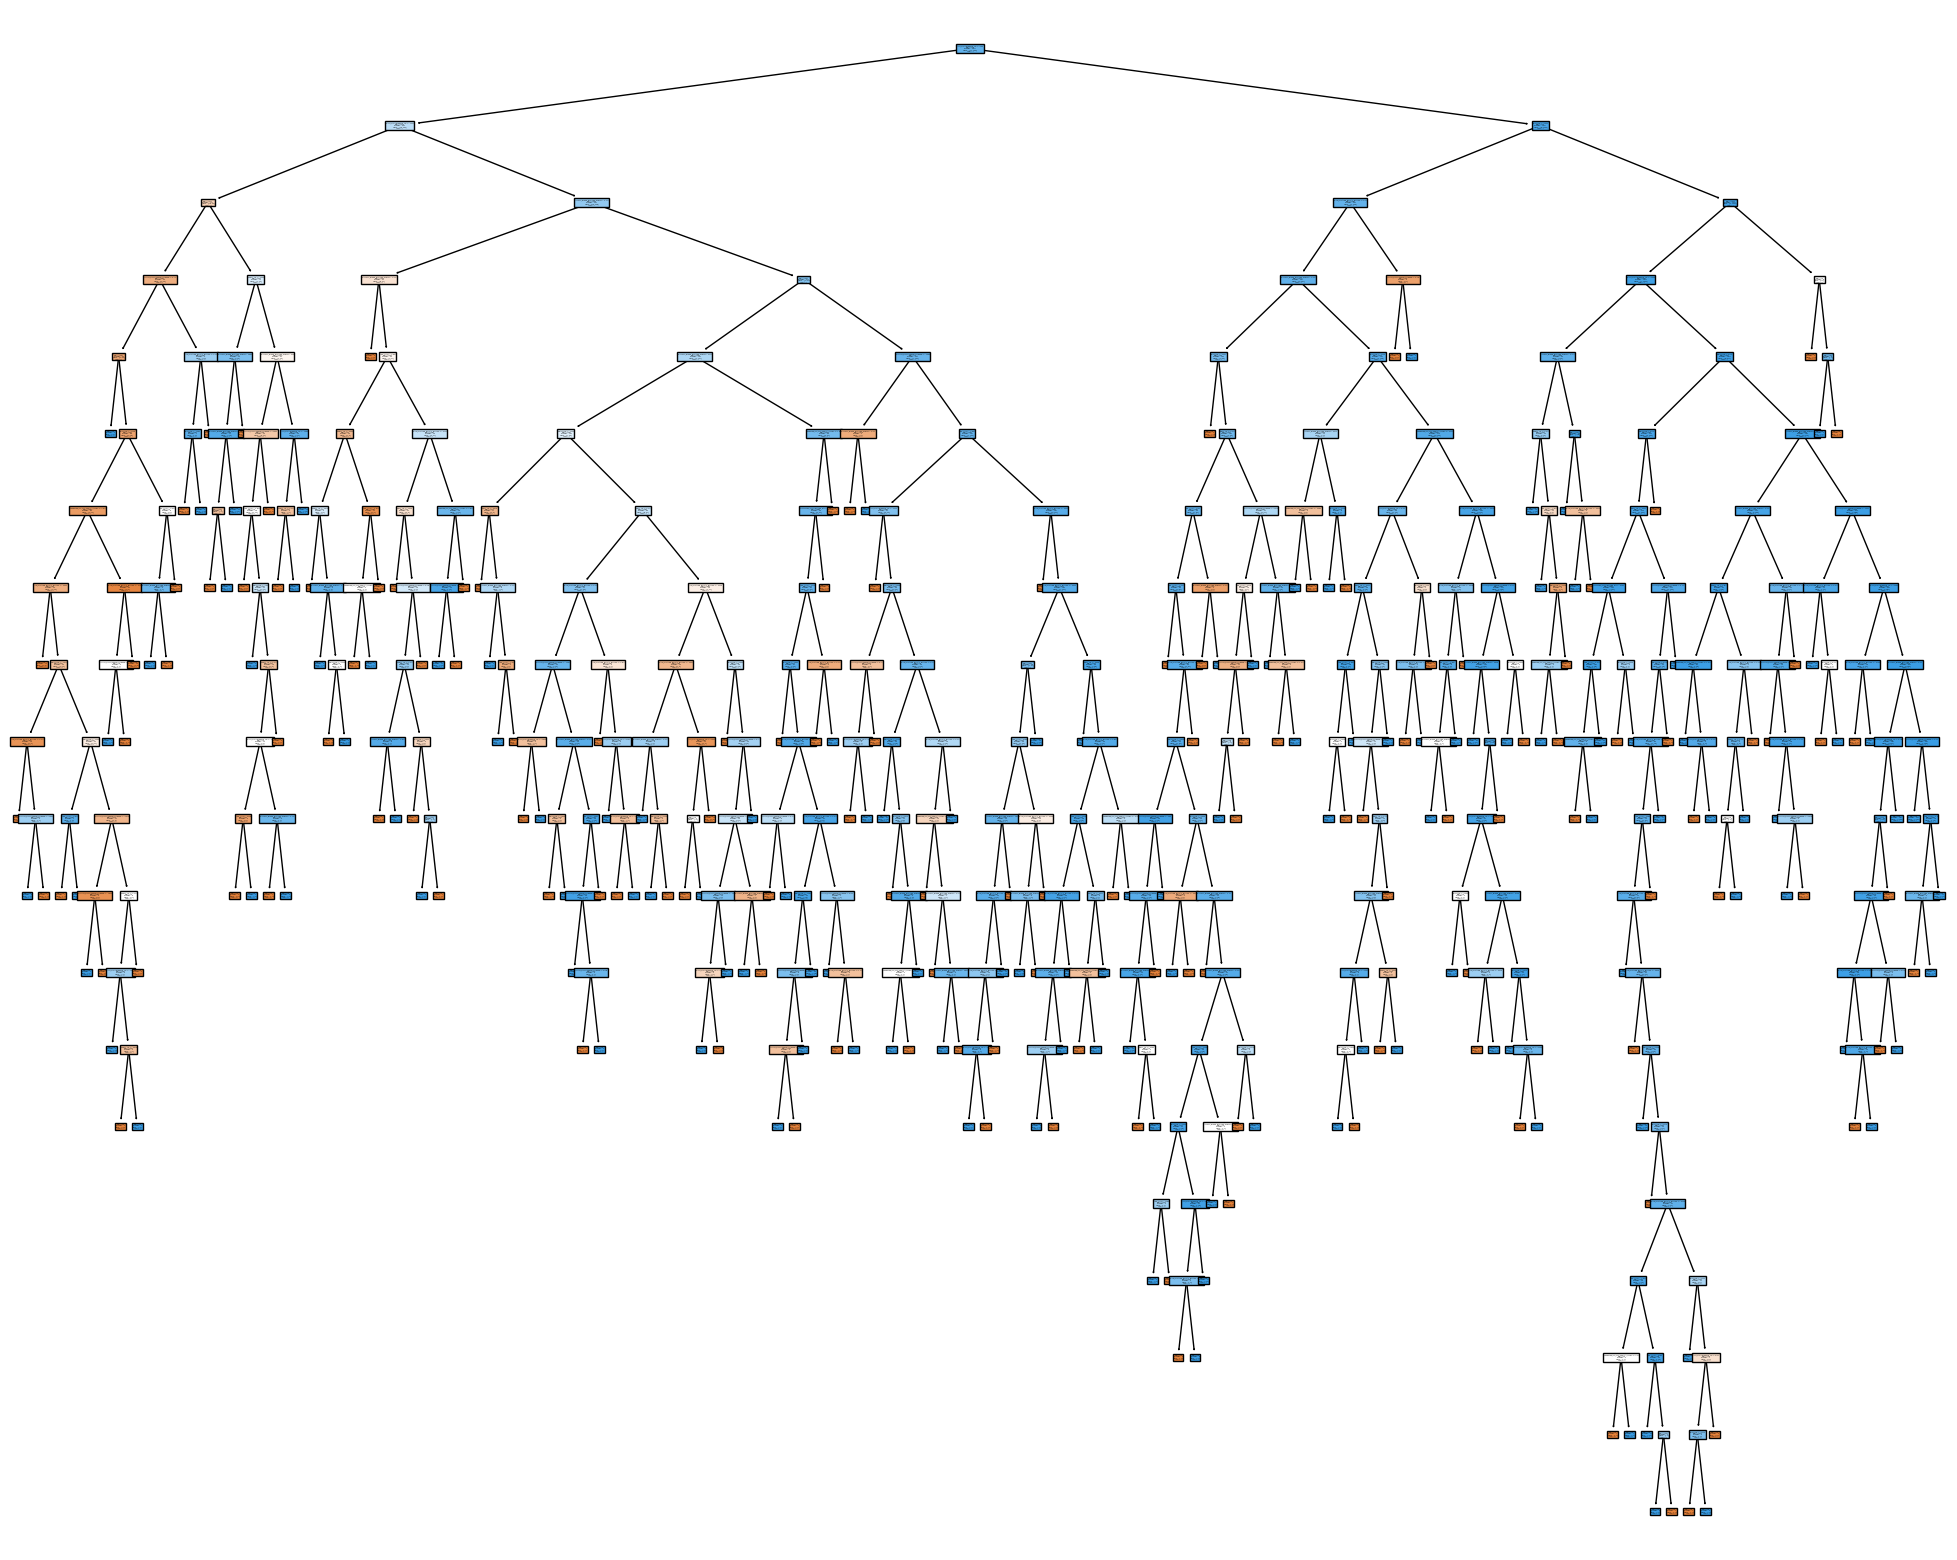

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['AGE_years','BMI ','HEIGHT_cm','WEIGHT_kg','WAIST_CIRCUMFERENCE_cm','DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WALK_DURATION_PER_DAY_MINUTES','COMPUTER_USE_TIME_PER_DAY_HOURS','SMOKING_STATUS ','CIGARETTES_CONSUMED_PER_DAY'],
                   class_names=['0','1'],
                   filled=True)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8554778554778555


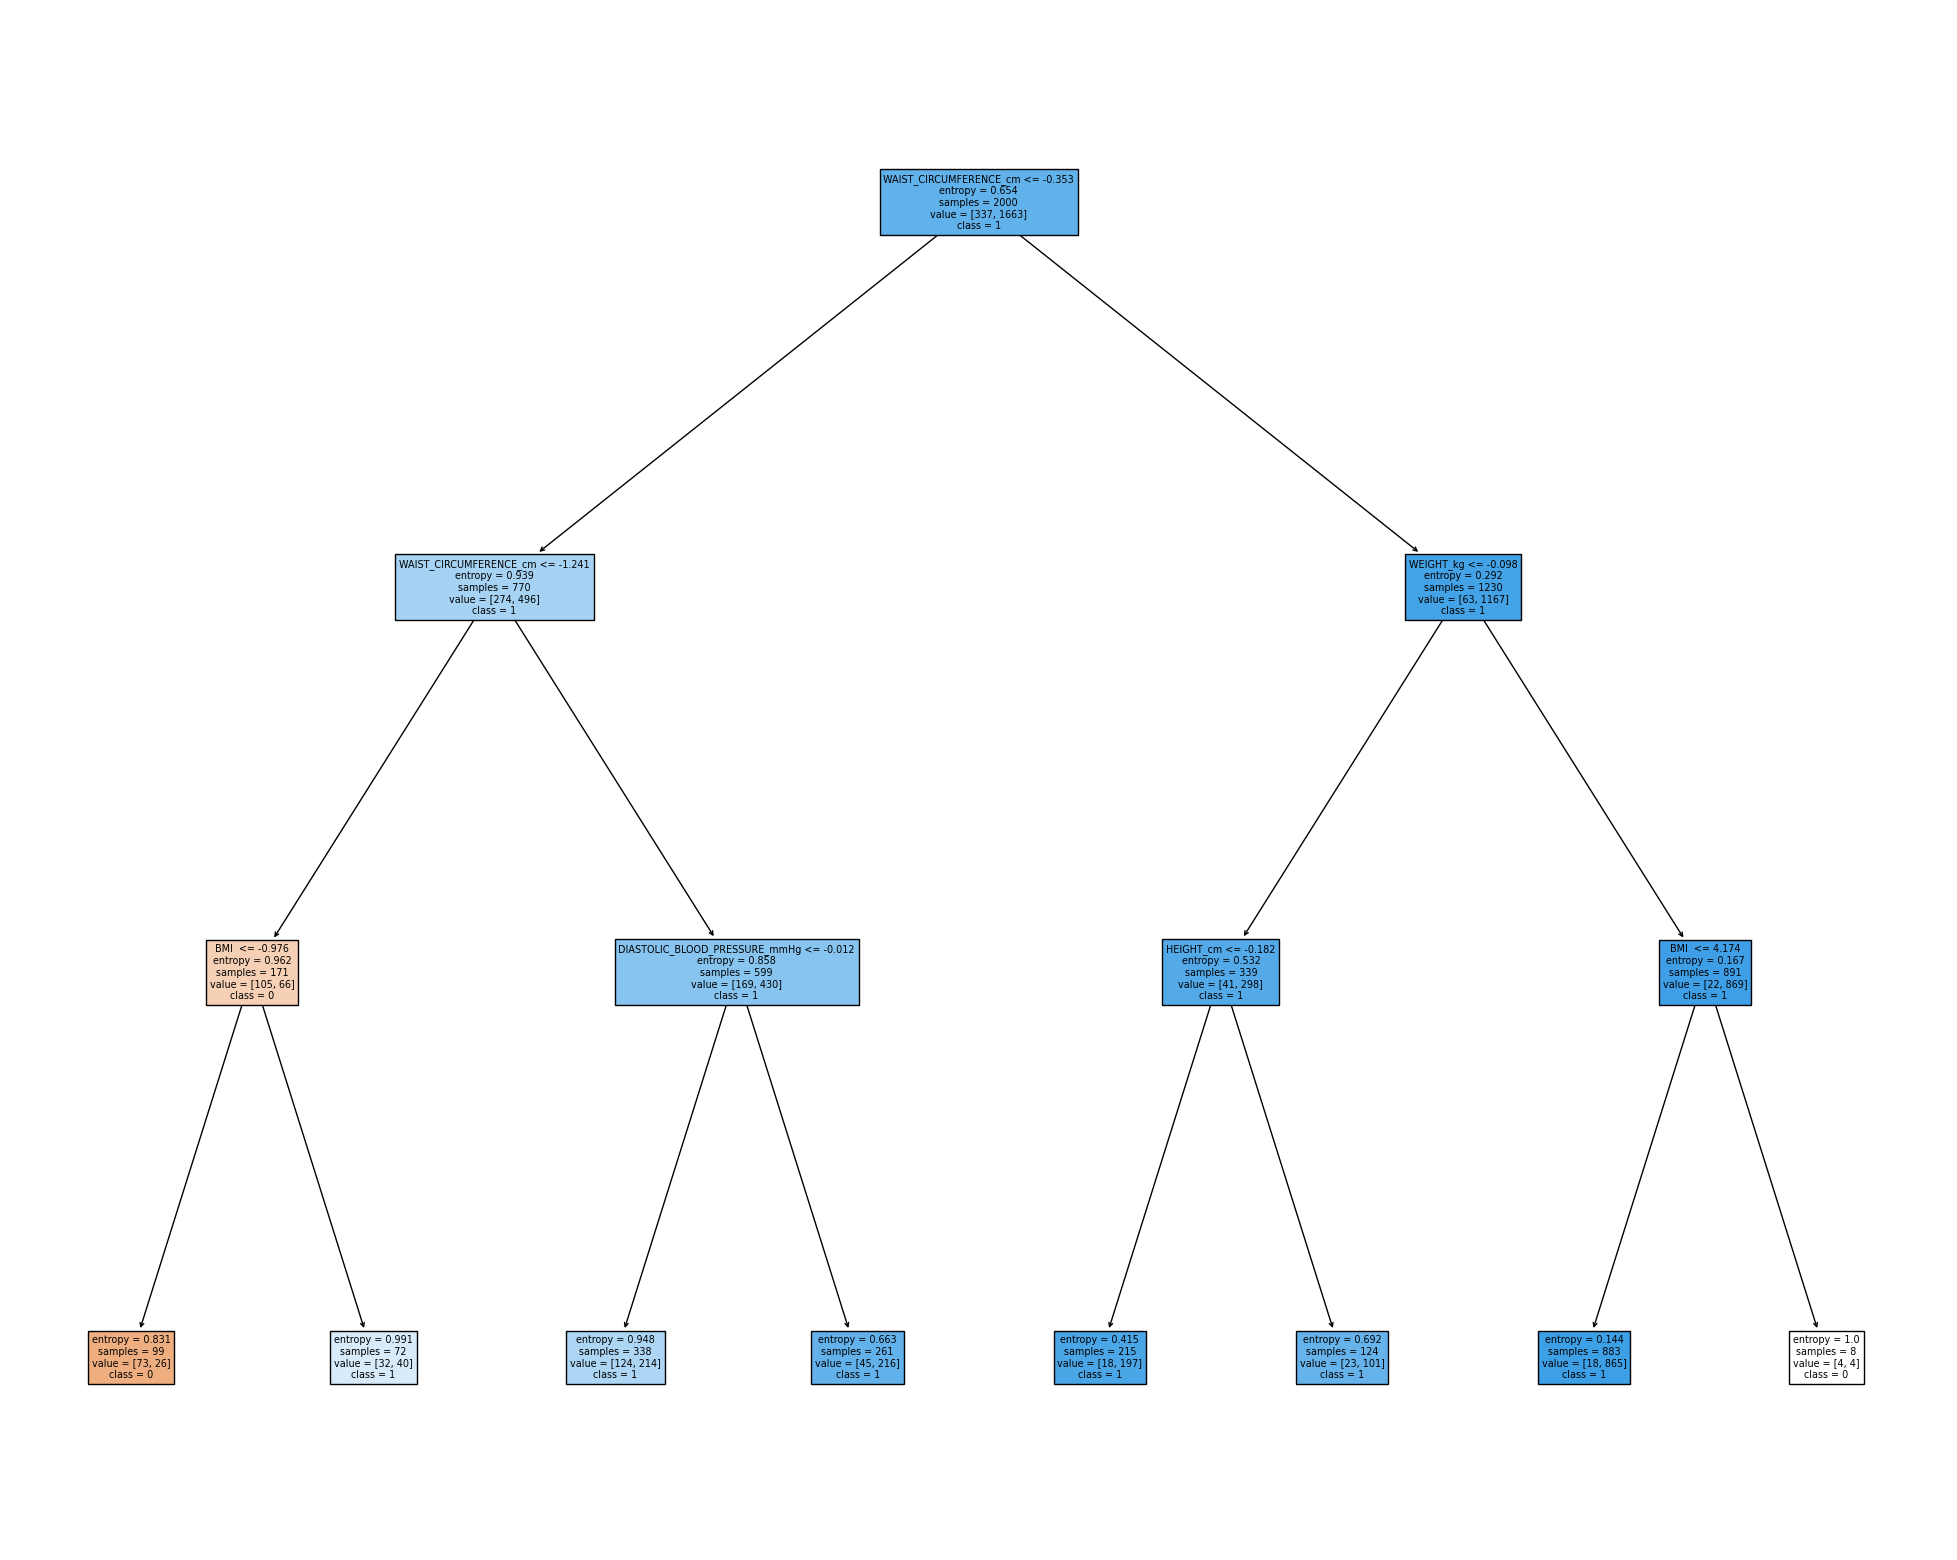

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['AGE_years','BMI ','HEIGHT_cm','WEIGHT_kg','WAIST_CIRCUMFERENCE_cm','DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WALK_DURATION_PER_DAY_MINUTES','COMPUTER_USE_TIME_PER_DAY_HOURS','SMOKING_STATUS ','CIGARETTES_CONSUMED_PER_DAY'],  
                   class_names=['0','1'],
                   filled=True)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


0.8554778554778555


array([[ 25, 100],
       [ 24, 709]])

Text(0.5, 427.9555555555555, 'Predicted label')

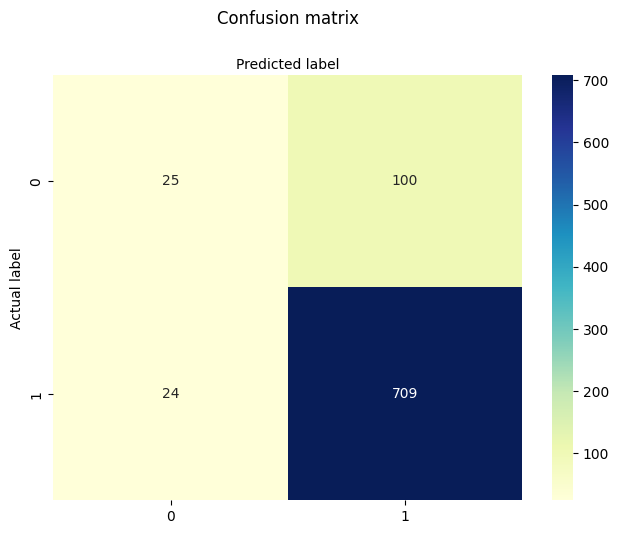

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8554778554778555
Precision: 0.8763906056860321
Recall: 0.9672578444747613
F1_score: 0.9195849546044098
AUC_ROC: 0.5836289222373806


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 25 100]
 [ 24 709]]
              precision    recall  f1-score   support

           0       0.51      0.20      0.29       125
           1       0.88      0.97      0.92       733

    accuracy                           0.86       858
   macro avg       0.69      0.58      0.60       858
weighted avg       0.82      0.86      0.83       858



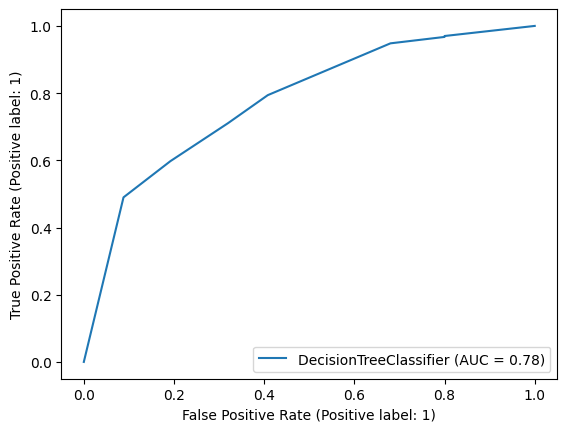

In [ ]:
from sklearn.metrics import RocCurveDisplay
sgd_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.7768894952251024

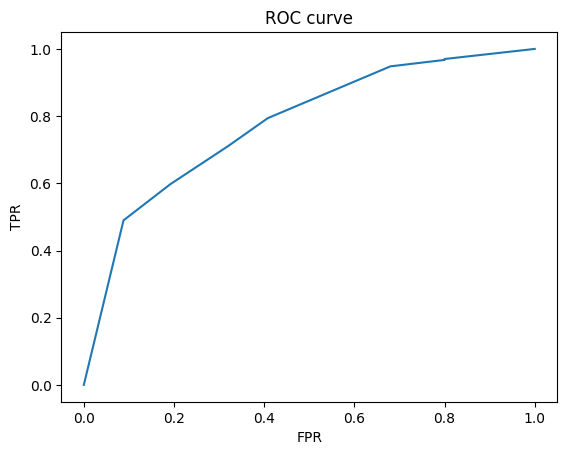

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# ***Decision Tree Hyperparameter Tuning***

In [ ]:
# finding the best parameters for the decision tree
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [3,4,5, 6, 10, 12]}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring = 'f1')
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


In [ ]:
Dt_final = grid_search.best_estimator_
Dt_final

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
tree1 = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=3,
                                     max_features='auto',
                                     random_state=42)

tree1.fit(X_train,y_train)

print("Training Score In Decision Tree Classification:",tree1.score(X_train, y_train))
print("Validation Score In Decision Tree: Classification",tree1.score(X_test, y_test))
y_pred_g = tree1.predict(X_test)

print("DT Accuracy=",accuracy_score(y_test, y_pred_g))
print("DT F1 score=",f1_score(y_test, y_pred_g))


Training Score In Decision Tree Classification: 0.8325
Validation Score In Decision Tree: Classification 0.8531468531468531
DT Accuracy= 0.8531468531468531
DT F1 score= 0.920754716981132


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


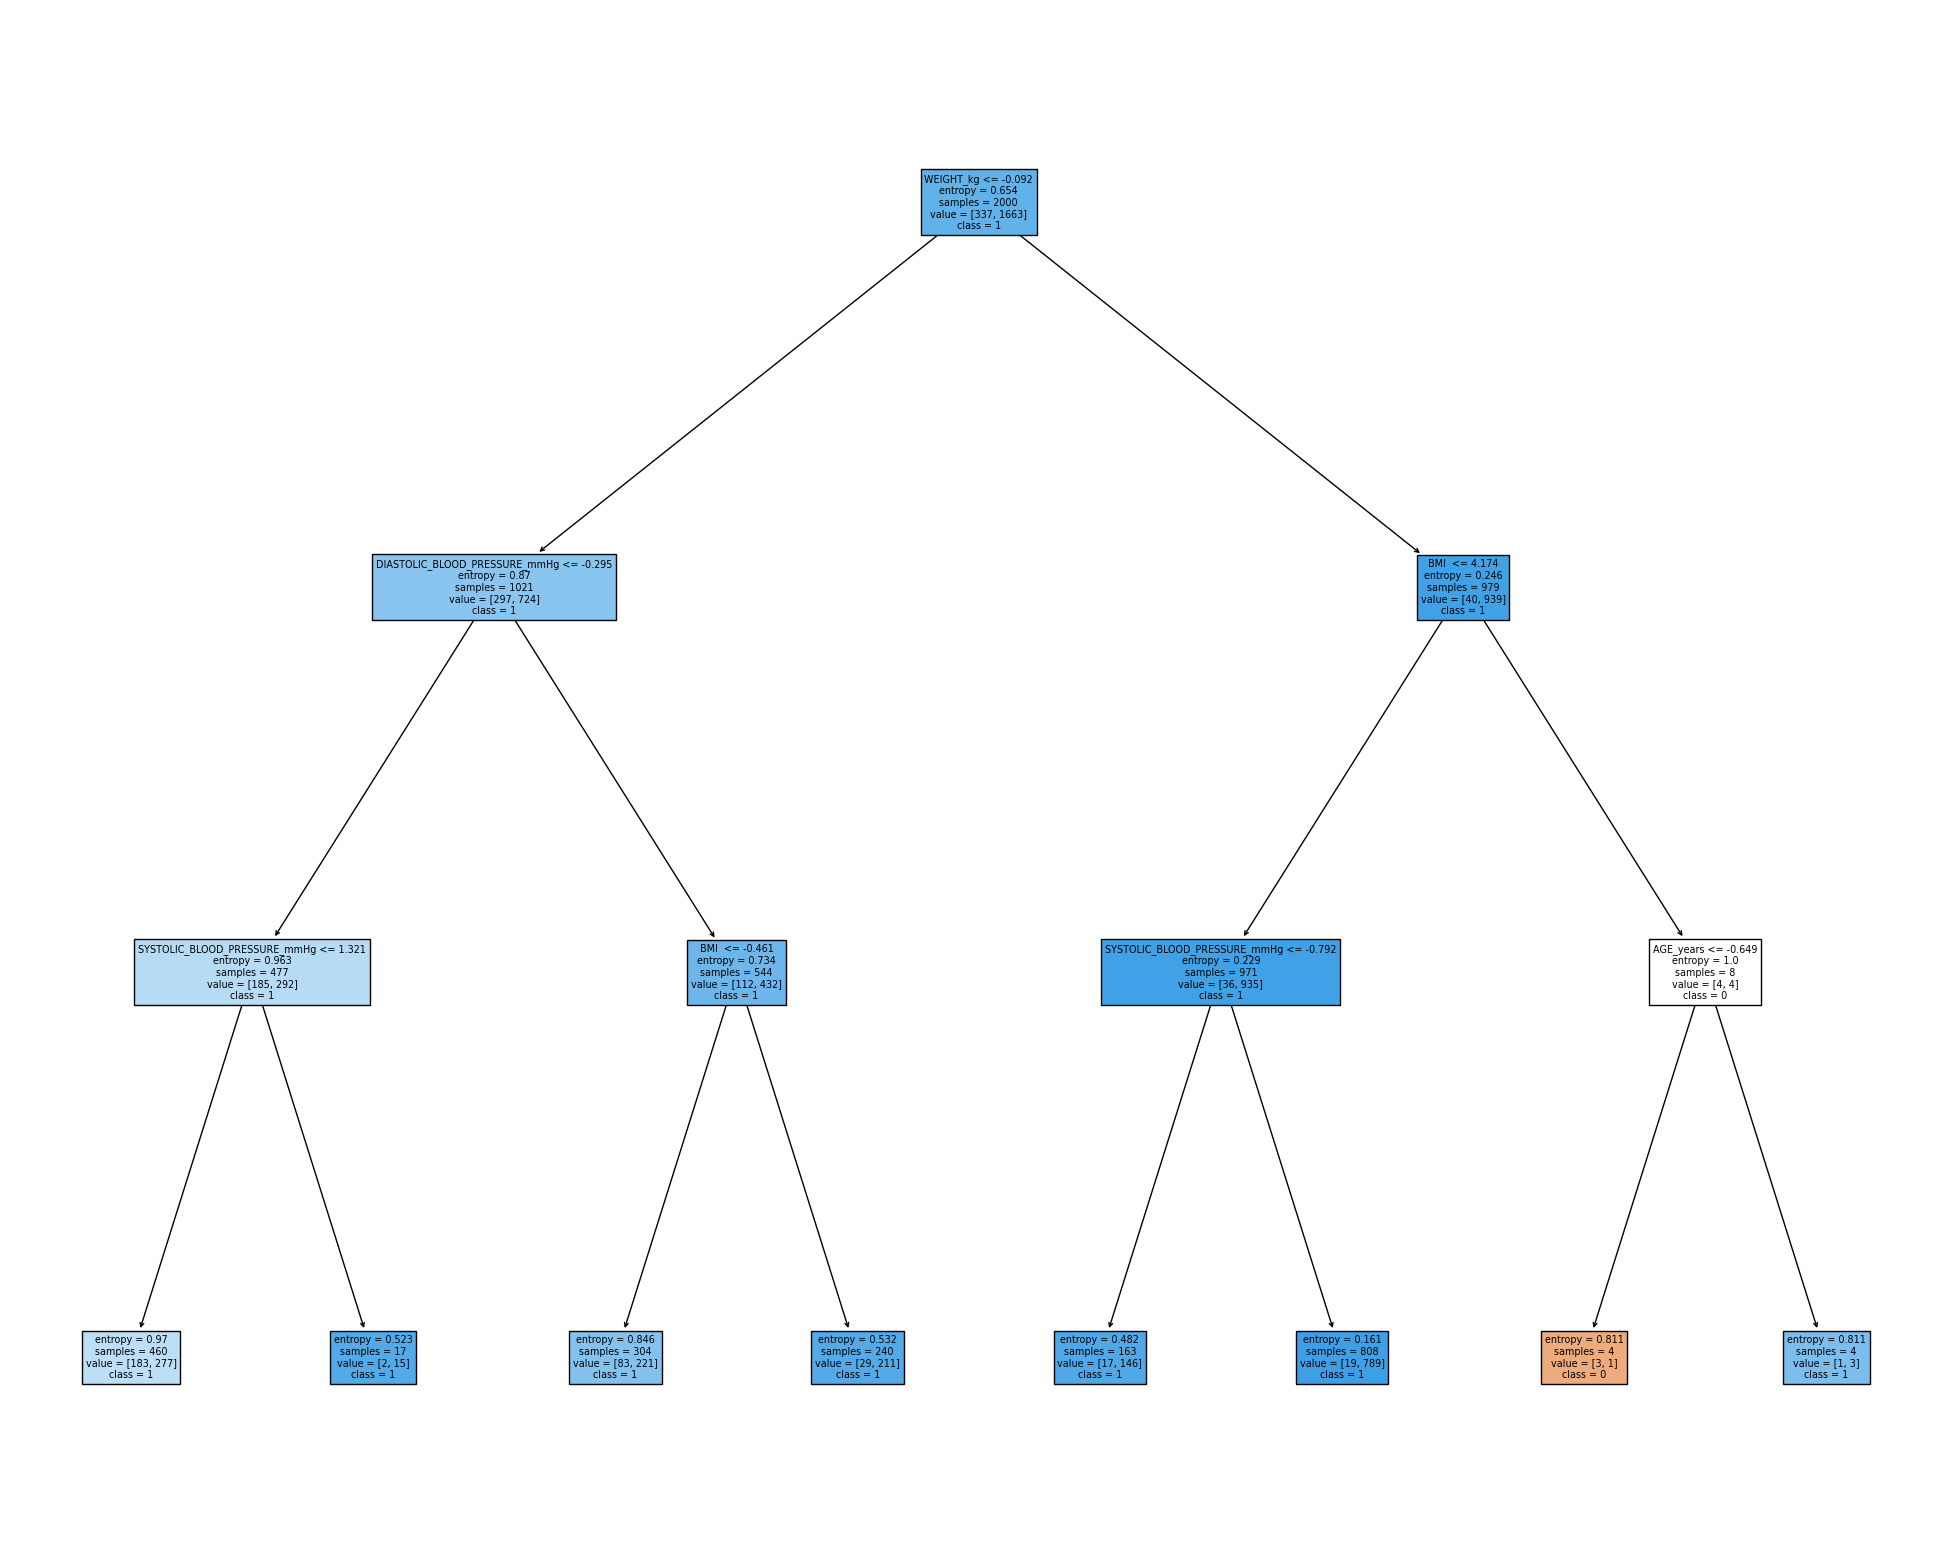

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1, 
                   feature_names=['AGE_years','BMI ','HEIGHT_cm','WEIGHT_kg','WAIST_CIRCUMFERENCE_cm','DIASTOLIC_BLOOD_PRESSURE_mmHg','SYSTOLIC_BLOOD_PRESSURE_mmHg','WALK_DURATION_PER_DAY_MINUTES','COMPUTER_USE_TIME_PER_DAY_HOURS','SMOKING_STATUS ','CIGARETTES_CONSUMED_PER_DAY'],  
                   class_names=['0','1'],
                   filled=True)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_g)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix_g = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_g


0.8531468531468531


array([[ 25, 100],
       [ 23, 710]])

Text(0.5, 427.9555555555555, 'Predicted label')

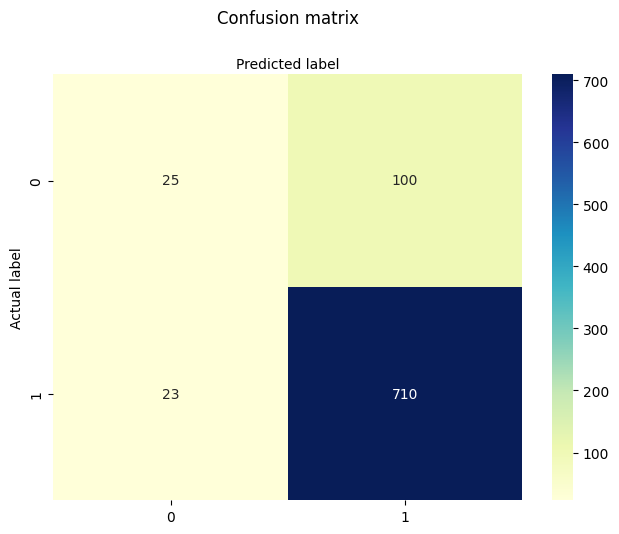

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_g), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_g))
print("Precision:",metrics.precision_score(y_test, y_pred_g))
print("Recall:",metrics.recall_score(y_test, y_pred_g))
print("F1_score:",metrics.f1_score(y_test, y_pred_g))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_g))

Accuracy: 0.8531468531468531
Precision: 0.8541423570595099
Recall: 0.9986357435197817
F1_score: 0.920754716981132
AUC_ROC: 0.49931787175989084


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_g))
print(classification_report(y_test,y_pred_g))

[[  0 125]
 [  1 732]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.85      1.00      0.92       733

    accuracy                           0.85       858
   macro avg       0.43      0.50      0.46       858
weighted avg       0.73      0.85      0.79       858



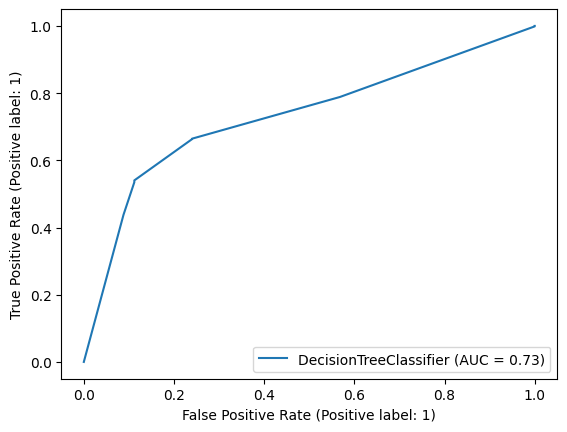

In [ ]:
from sklearn.metrics import RocCurveDisplay
sgd_disp = RocCurveDisplay.from_estimator(tree1, X_test, y_test)

# ***K-Nearest Neighbors Model KNN*** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_knn)))

In [ ]:
# print the scores on training and test set
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9025
Test set score: 0.8263


These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn)

print("Accuracy score (KNN): ", knn_score)


Accuracy score (KNN):  0.8263403263403264


In [ ]:
knn.score(X_test, y_test)

0.8263403263403264

In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[ 35,  90],
       [ 59, 674]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_knn))

Accuracy: 0.8263403263403264
Precision: 0.8821989528795812
Recall: 0.9195088676671214
F1_score: 0.9004676018704074
AUC_ROC: 0.5997544338335608


In [ ]:
print(classification_report(y_test, y_pred_knn))  # knn classification report

              precision    recall  f1-score   support

           0       0.37      0.28      0.32       125
           1       0.88      0.92      0.90       733

    accuracy                           0.83       858
   macro avg       0.63      0.60      0.61       858
weighted avg       0.81      0.83      0.82       858



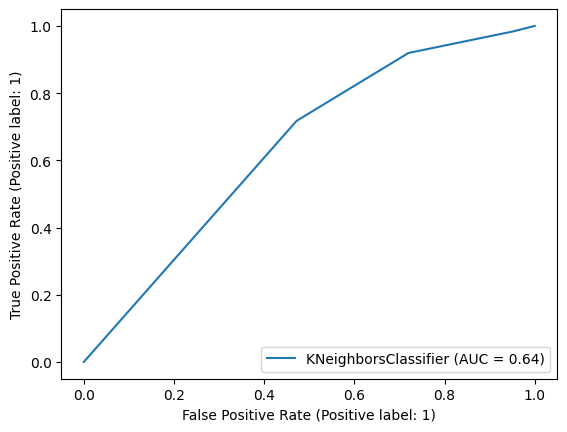

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


Text(0, 0.5, 'Mean Error')

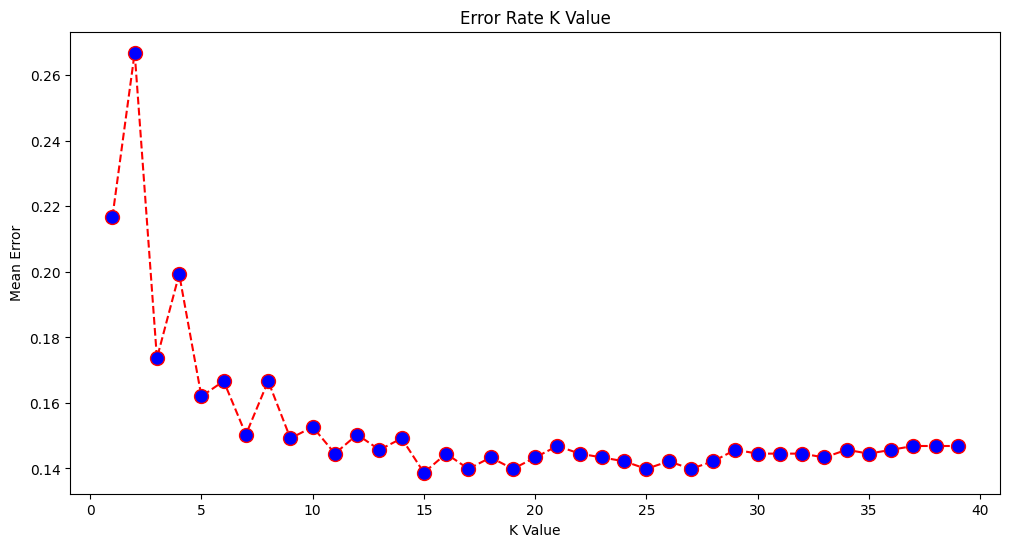

In [ ]:
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
knn2.predict(X_test)[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# print the scores on training and test set
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn2.score(X_test, y_test)))

Training set score: 0.8710
Test set score: 0.8497


These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
knn2.score(X_test, y_test)


0.8496503496503497

In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn2)

print("Accuracy score (KNN): ", knn_score)


Accuracy score (KNN):  0.8496503496503497


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn2))
print("Precision:",metrics.precision_score(y_test, y_pred_knn2))
print("Recall:",metrics.recall_score(y_test, y_pred_knn2))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn2))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_knn2))

Accuracy: 0.8496503496503497
Precision: 0.8803526448362721
Recall: 0.9536152796725784
F1_score: 0.9155206286836934
AUC_ROC: 0.5968076398362891


In [ ]:
confusion_matrix(y_test, y_pred_knn2)

array([[ 30,  95],
       [ 34, 699]])

In [ ]:
print(classification_report(y_test, y_pred_knn2))  # knn classification report

              precision    recall  f1-score   support

           0       0.47      0.24      0.32       125
           1       0.88      0.95      0.92       733

    accuracy                           0.85       858
   macro avg       0.67      0.60      0.62       858
weighted avg       0.82      0.85      0.83       858



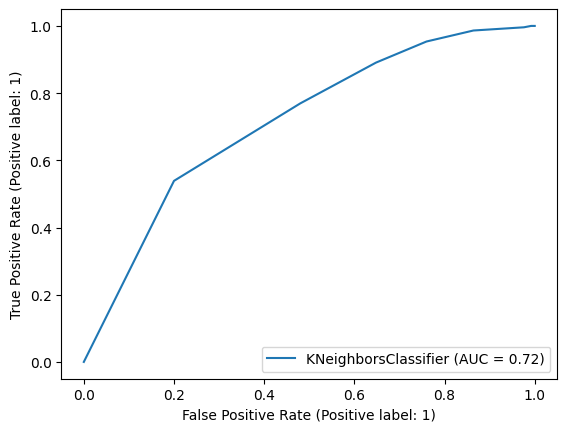

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn2, X_test, y_test)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2) 
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5) 
#print each cv score (accuracy) and average them
print(cv_scores) 
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.58566434 0.66783217 0.74125874 0.79334501 0.80210158]
cv_scores mean:0.7180403659387897


# ***K-Nearest Neighbors Model KNN Hyperparameter Tuning***




In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn3 = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)} 
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5) 
#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_


0.8446499210071888

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 13)
knn3.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred_knn3 = knn3.predict(X_test)

In [ ]:
# print the scores on training and test set
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn3.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn3.score(X_test, y_test)))

Training set score: 0.8600
Test set score: 0.8543


These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
knn3.score(X_test, y_test)


0.8543123543123543

In [ ]:
knn_score3 = accuracy_score(y_test, y_pred_knn3)

print("Accuracy score (KNN): ", knn_score3)


Accuracy score (KNN):  0.8543123543123543


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn3))
print("Precision:",metrics.precision_score(y_test, y_pred_knn3))
print("Recall:",metrics.recall_score(y_test, y_pred_knn3))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn3))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_knn3))

Accuracy: 0.8543123543123543
Precision: 0.8753086419753087
Recall: 0.9672578444747613
F1_score: 0.9189889825016202
AUC_ROC: 0.5796289222373806


In [ ]:
confusion_matrix(y_test, y_pred_knn3)

array([[ 24, 101],
       [ 24, 709]])

In [ ]:
print(classification_report(y_test, y_pred_knn3))  # knn classification report

              precision    recall  f1-score   support

           0       0.50      0.19      0.28       125
           1       0.88      0.97      0.92       733

    accuracy                           0.85       858
   macro avg       0.69      0.58      0.60       858
weighted avg       0.82      0.85      0.83       858



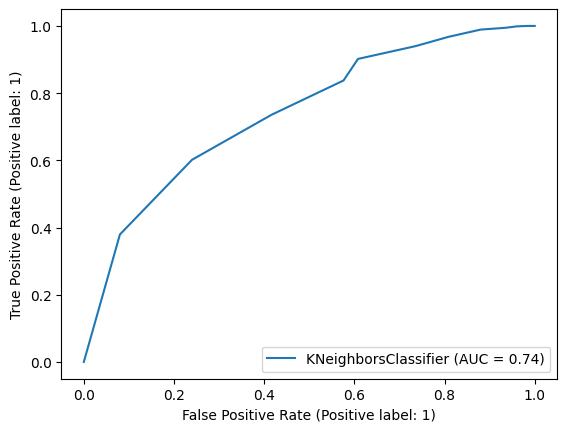

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn3, X_test, y_test)

In [ ]:
# Normalization:
#x = (X - np.min(X)) / (np.max(X) - np.min(X))


# ***Naive Bayes NB Model***




In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred_NB1 = nb.predict(X_test)

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.7715617715617715


In [ ]:
nb_score1 = accuracy_score(y_test, y_pred_NB1)

print("Accuracy score (KNN): ", nb_score1)


Accuracy score (KNN):  0.7715617715617715


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB1))
print("Precision:",metrics.precision_score(y_test, y_pred_NB1))
print("Recall:",metrics.recall_score(y_test, y_pred_NB1))
print("F1_score:",metrics.f1_score(y_test, y_pred_NB1))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_NB1))

Accuracy: 0.7715617715617715
Precision: 0.908675799086758
Recall: 0.8144611186903138
F1_score: 0.8589928057553957
AUC_ROC: 0.6672305593451568


In [ ]:
confusion_matrix(y_test, y_pred_NB1)

array([[ 65,  60],
       [136, 597]])

In [ ]:
print(classification_report(y_test, y_pred_NB1))

              precision    recall  f1-score   support

           0       0.32      0.52      0.40       125
           1       0.91      0.81      0.86       733

    accuracy                           0.77       858
   macro avg       0.62      0.67      0.63       858
weighted avg       0.82      0.77      0.79       858



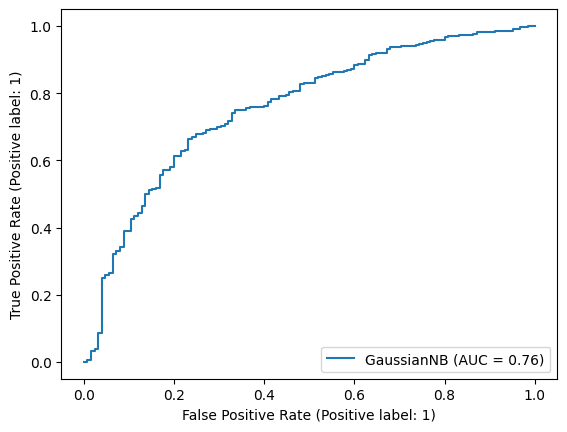

In [ ]:
knn_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_trainN, y_trainN)

y_pred_NB = mnb.predict(X_testN)

print('Accuracy: {:.2f}'.format(accuracy_score(y_testN, y_pred_NB)))


Accuracy: 0.74


In [ ]:
print("Naive Bayes score2: ",mnb.score(X_testN, y_testN))


Naive Bayes score2:  0.7377622377622378


In [ ]:
y_pred_NB2 = mnb.predict(X_testN)

In [ ]:
nb_score2 = accuracy_score(y_testN, y_pred_NB2)

print("Accuracy score (KNN)MNB: ", nb_score2)


Accuracy score (KNN)MNB:  0.7377622377622378


In [ ]:
confusion_matrix(y_testN, y_pred_NB2)

array([[ 49,  76],
       [149, 584]])

In [ ]:
print(classification_report(y_testN, y_pred_NB2))

              precision    recall  f1-score   support

           0       0.25      0.39      0.30       125
           1       0.88      0.80      0.84       733

    accuracy                           0.74       858
   macro avg       0.57      0.59      0.57       858
weighted avg       0.79      0.74      0.76       858



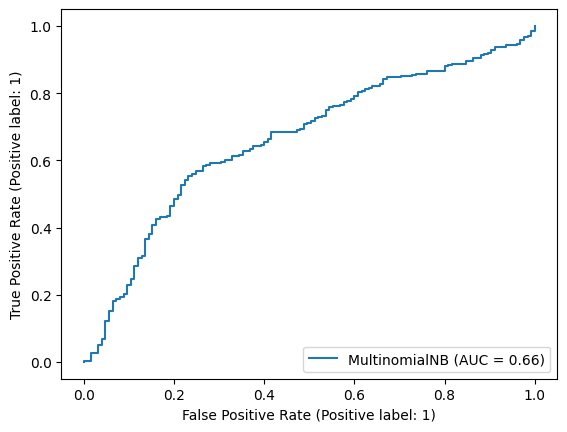

In [ ]:
knn_disp2 = RocCurveDisplay.from_estimator(mnb, X_testN, y_testN)

# ***Naive Bayes NB Hyperparameter Tuning***




In [ ]:
from sklearn.model_selection import GridSearchCV
np.logspace(0,-9, num=10)
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


gs_NB = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [ ]:
gs_NB.best_score_

0.8574164740015412

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

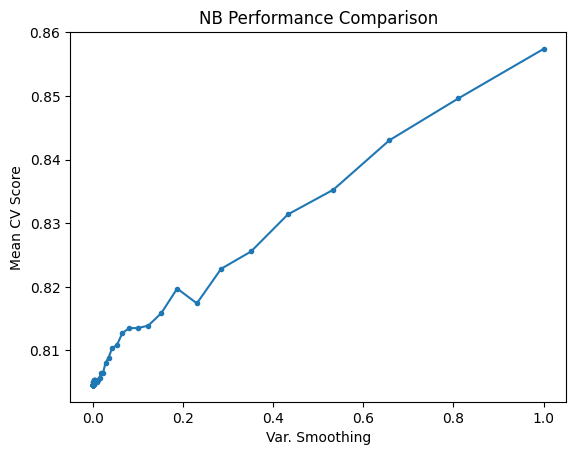

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8613053613053613


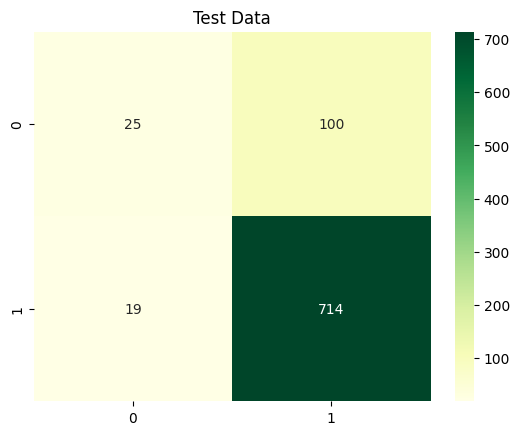

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.57      0.20      0.30       125
           1       0.88      0.97      0.92       733

    accuracy                           0.86       858
   macro avg       0.72      0.59      0.61       858
weighted avg       0.83      0.86      0.83       858



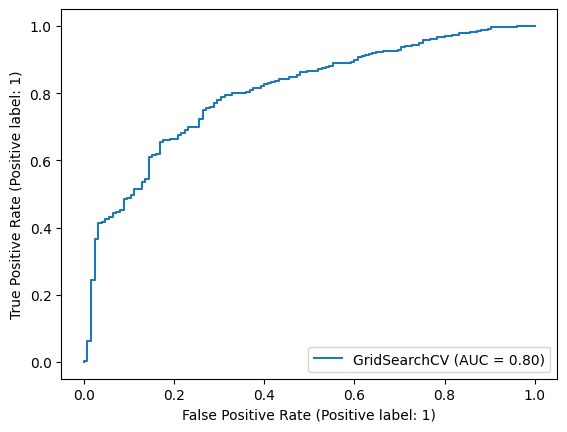

In [ ]:
gs_NB_disp2 = RocCurveDisplay.from_estimator(gs_NB, X_test, y_test)

# ***ANN MLP Model***




In [ ]:
from sklearn.neural_network import MLPClassifier

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train_mlp = mlp.predict(X_train)
predict_test_mlp  = mlp.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("MLP SCORE: ",mlp.score(X_test, y_test))


MLP SCORE:  0.8519813519813519


In [ ]:
mlp_score = accuracy_score(y_test, predict_test_mlp)

print("Accuracy score MLP: ", mlp_score)


Accuracy score MLP:  0.8519813519813519


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predict_test_mlp))
print("Precision:",metrics.precision_score(y_test, predict_test_mlp))
print("Recall:",metrics.recall_score(y_test, predict_test_mlp))
print("F1_score:",metrics.f1_score(y_test, predict_test_mlp))
print("AUC_ROC:",metrics.roc_auc_score(y_test, predict_test_mlp))

Accuracy: 0.8519813519813519
Precision: 0.887468030690537
Recall: 0.946793997271487
F1_score: 0.9161716171617161
AUC_ROC: 0.6213969986357436


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train, predict_train_mlp))
print(classification_report(y_train, predict_train_mlp))

[[ 136  201]
 [  52 1611]]
              precision    recall  f1-score   support

           0       0.72      0.40      0.52       337
           1       0.89      0.97      0.93      1663

    accuracy                           0.87      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
print(confusion_matrix(y_test,predict_test_mlp))
print(classification_report(y_test,predict_test_mlp))


[[ 37  88]
 [ 39 694]]
              precision    recall  f1-score   support

           0       0.49      0.30      0.37       125
           1       0.89      0.95      0.92       733

    accuracy                           0.85       858
   macro avg       0.69      0.62      0.64       858
weighted avg       0.83      0.85      0.84       858



# ***ANN MLP Model Hyperparameter tuning***




In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(13,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter': [500]
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 0.862
Test Accuracy : 0.857
Best Accuracy Through Grid Search : 0.859
Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}


In [ ]:
mlp2 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (13,), learning_rate='constant', solver='lbfgs', max_iter=500)
mlp2.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(13,), max_iter=500, solver='lbfgs')

In [ ]:
predictions = mlp2.predict(X_test)

In [ ]:
mlp2_score = accuracy_score(y_test, predictions)

print("Accuracy score MLP_2: ", mlp2_score)

Accuracy score MLP_2:  0.8088578088578089


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_score:",metrics.f1_score(y_test, predictions))
print("AUC_ROC:",metrics.roc_auc_score(y_test, predictions))

Accuracy: 0.8088578088578089
Precision: 0.8808567603748326
Recall: 0.897680763983629
F1_score: 0.8891891891891892
AUC_ROC: 0.5928403819918145


In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 37  88]
 [ 39 694]]
              precision    recall  f1-score   support

           0       0.49      0.30      0.37       125
           1       0.89      0.95      0.92       733

    accuracy                           0.85       858
   macro avg       0.69      0.62      0.64       858
weighted avg       0.83      0.85      0.84       858



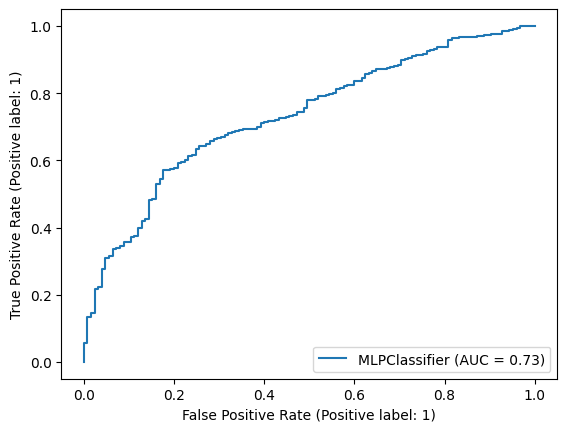

In [ ]:
mlp2_disp = RocCurveDisplay.from_estimator(mlp2, X_test, y_test)